# Plots degli attributi post-dataCleaning
I plot saranno per la maggior parte, risultato dell'esecuzione dello stesso codice del notebook **dataUnderstandingPlots.ipynb**.
Alcuni attributi sono stati plottati assieme per un miglior confronto

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv("../../data/cleaned_data.csv", parse_dates=["date"], low_memory=False)
color = "#6200EE"
edgecolor= "#03DAC5"

### Date
Nell'attributo in questione non sono presenti valori non corrispondenti ad effetive date, per avere un plot interessante, viene stampato il grafico a barre della distribuzione delle date degli incidenti, raggruppati per anno e per mese dell'anno e giorno della settimana.

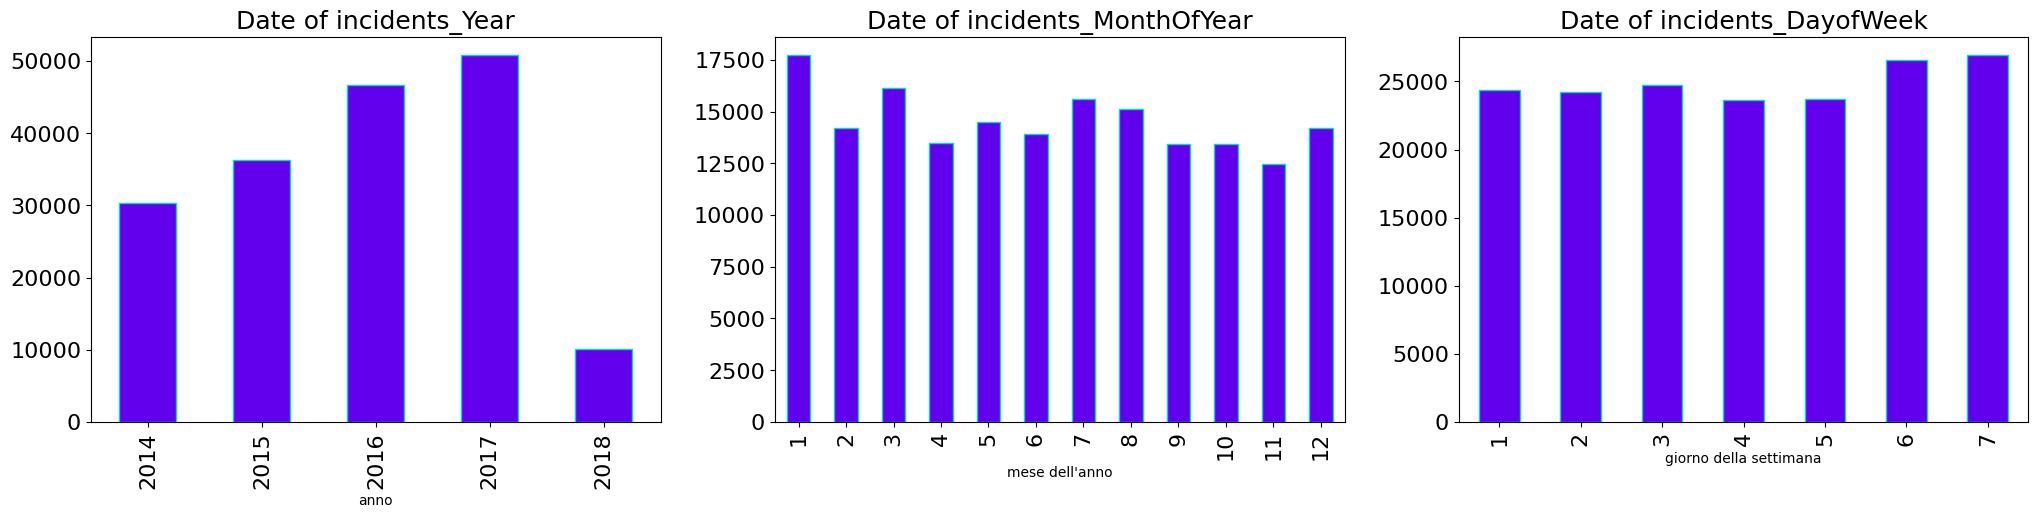

In [4]:
dateYear=data["date"].apply(lambda x: x.year)
dateMonth = data["date"].apply(lambda x: x.month)
dateDay = data["date"].apply(lambda x: x.weekday() + 1)
dateYear= dateYear.value_counts().sort_index()
dateMonth= dateMonth.value_counts().sort_index()
dateDay= dateDay.value_counts().sort_index()

dim=(1,3)
plt.figure(figsize=(25,5))

plt.subplot2grid(dim,(0,0))
dateYear.plot(kind="bar",title="Date of incidents_Year", color=color, edgecolor=edgecolor,fontsize=16, xlabel= "anno").title.set_size(18)

plt.subplot2grid(dim,(0,1))
dateMonth.plot(kind="bar",title="Date of incidents_MonthOfYear", color=color, edgecolor=edgecolor,fontsize=16,xlabel = "mese dell'anno").title.set_size(18)

#monday == "1"
plt.subplot2grid(dim,(0,2))
dateDay.plot(kind="bar",title="Date of incidents_DayofWeek", color=color, edgecolor=edgecolor,fontsize=16, xlabel="giorno della settimana").title.set_size(18)

### State
dato di tipo categorico, plottiamo la distribuzione.
District of columbia non è uno stato ma è una regione autonoma quindi non viene droppata.


state
Illinois                14745
California              11977
Florida                  9954
Texas                    9214
New York                 8020
Ohio                     7457
Pennsylvania             6894
Georgia                  6430
Louisiana                6248
North Carolina           6127
Tennessee                5240
Missouri                 5220
South Carolina           4972
Maryland                 4384
New Jersey               4261
Indiana                  4196
Virginia                 4132
Michigan                 4128
Alabama                  4076
Massachusetts            4016
Wisconsin                3340
Kentucky                 2933
Mississippi              2669
Oklahoma                 2576
Washington               2524
Connecticut              2335
Colorado                 2204
Arkansas                 2186
Iowa                     1741
Arizona                  1678
Kansas                   1590
Oregon                   1579
Minnesota                1565
Neva

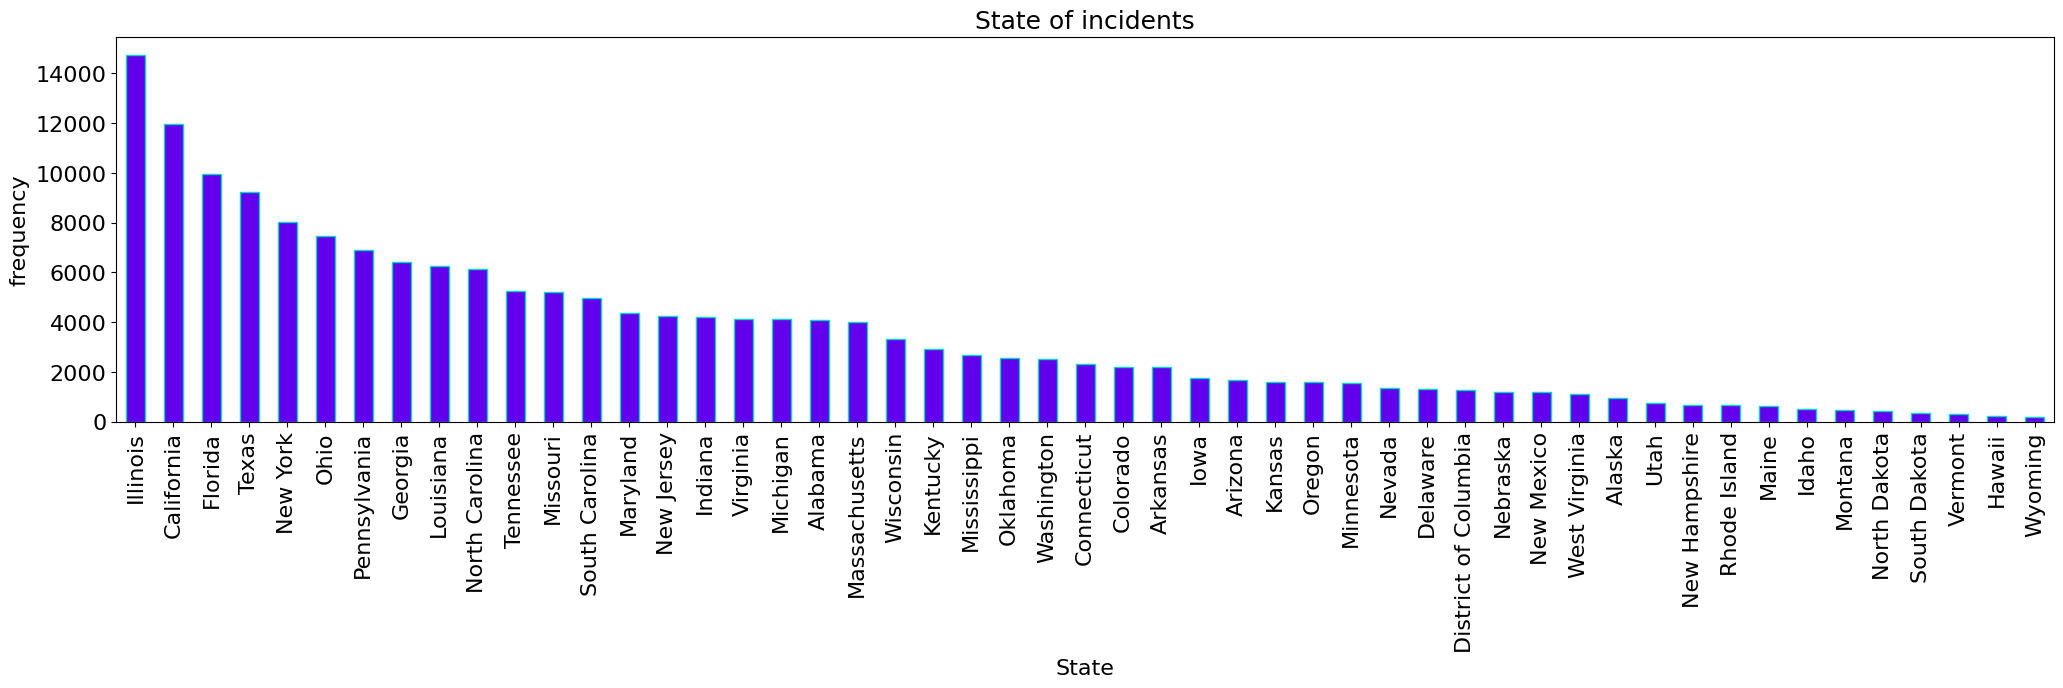

In [5]:
state=data["state"].value_counts()

plt.figure(figsize=(25,5))
ax=state.plot(kind="bar",title="State of incidents", color=color, edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_ylabel("frequency",fontsize= 16)
ax.set_xlabel("State",fontsize=16)
print(state)

### Latitude and Longitude
Gli attributi state, city_or_county, address, congressional_district, state_house_district e state_senate_district si possono inferire dalla coppia (latitude, longitude) quindi per la distribuzione, basta plottare lo scatter della coppia..

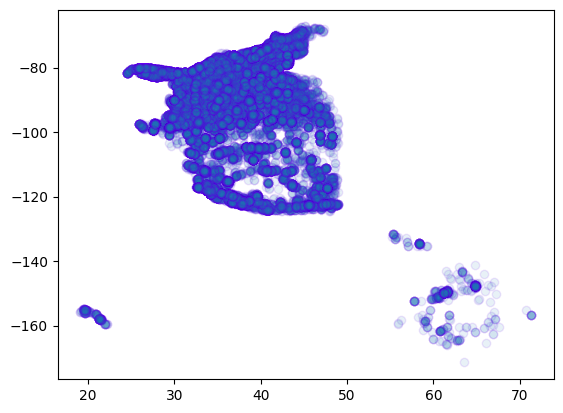

In [6]:
a=plt.scatter(data["latitude"],data["longitude"],alpha = 0.1, edgecolors=color)
plt.show()


#### Luogo dell'incidente
Il luogo dell'incidente viene individuato attraverso la coppia <latitude, longitude>

/tmp/ipykernel_52199/1811612268.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


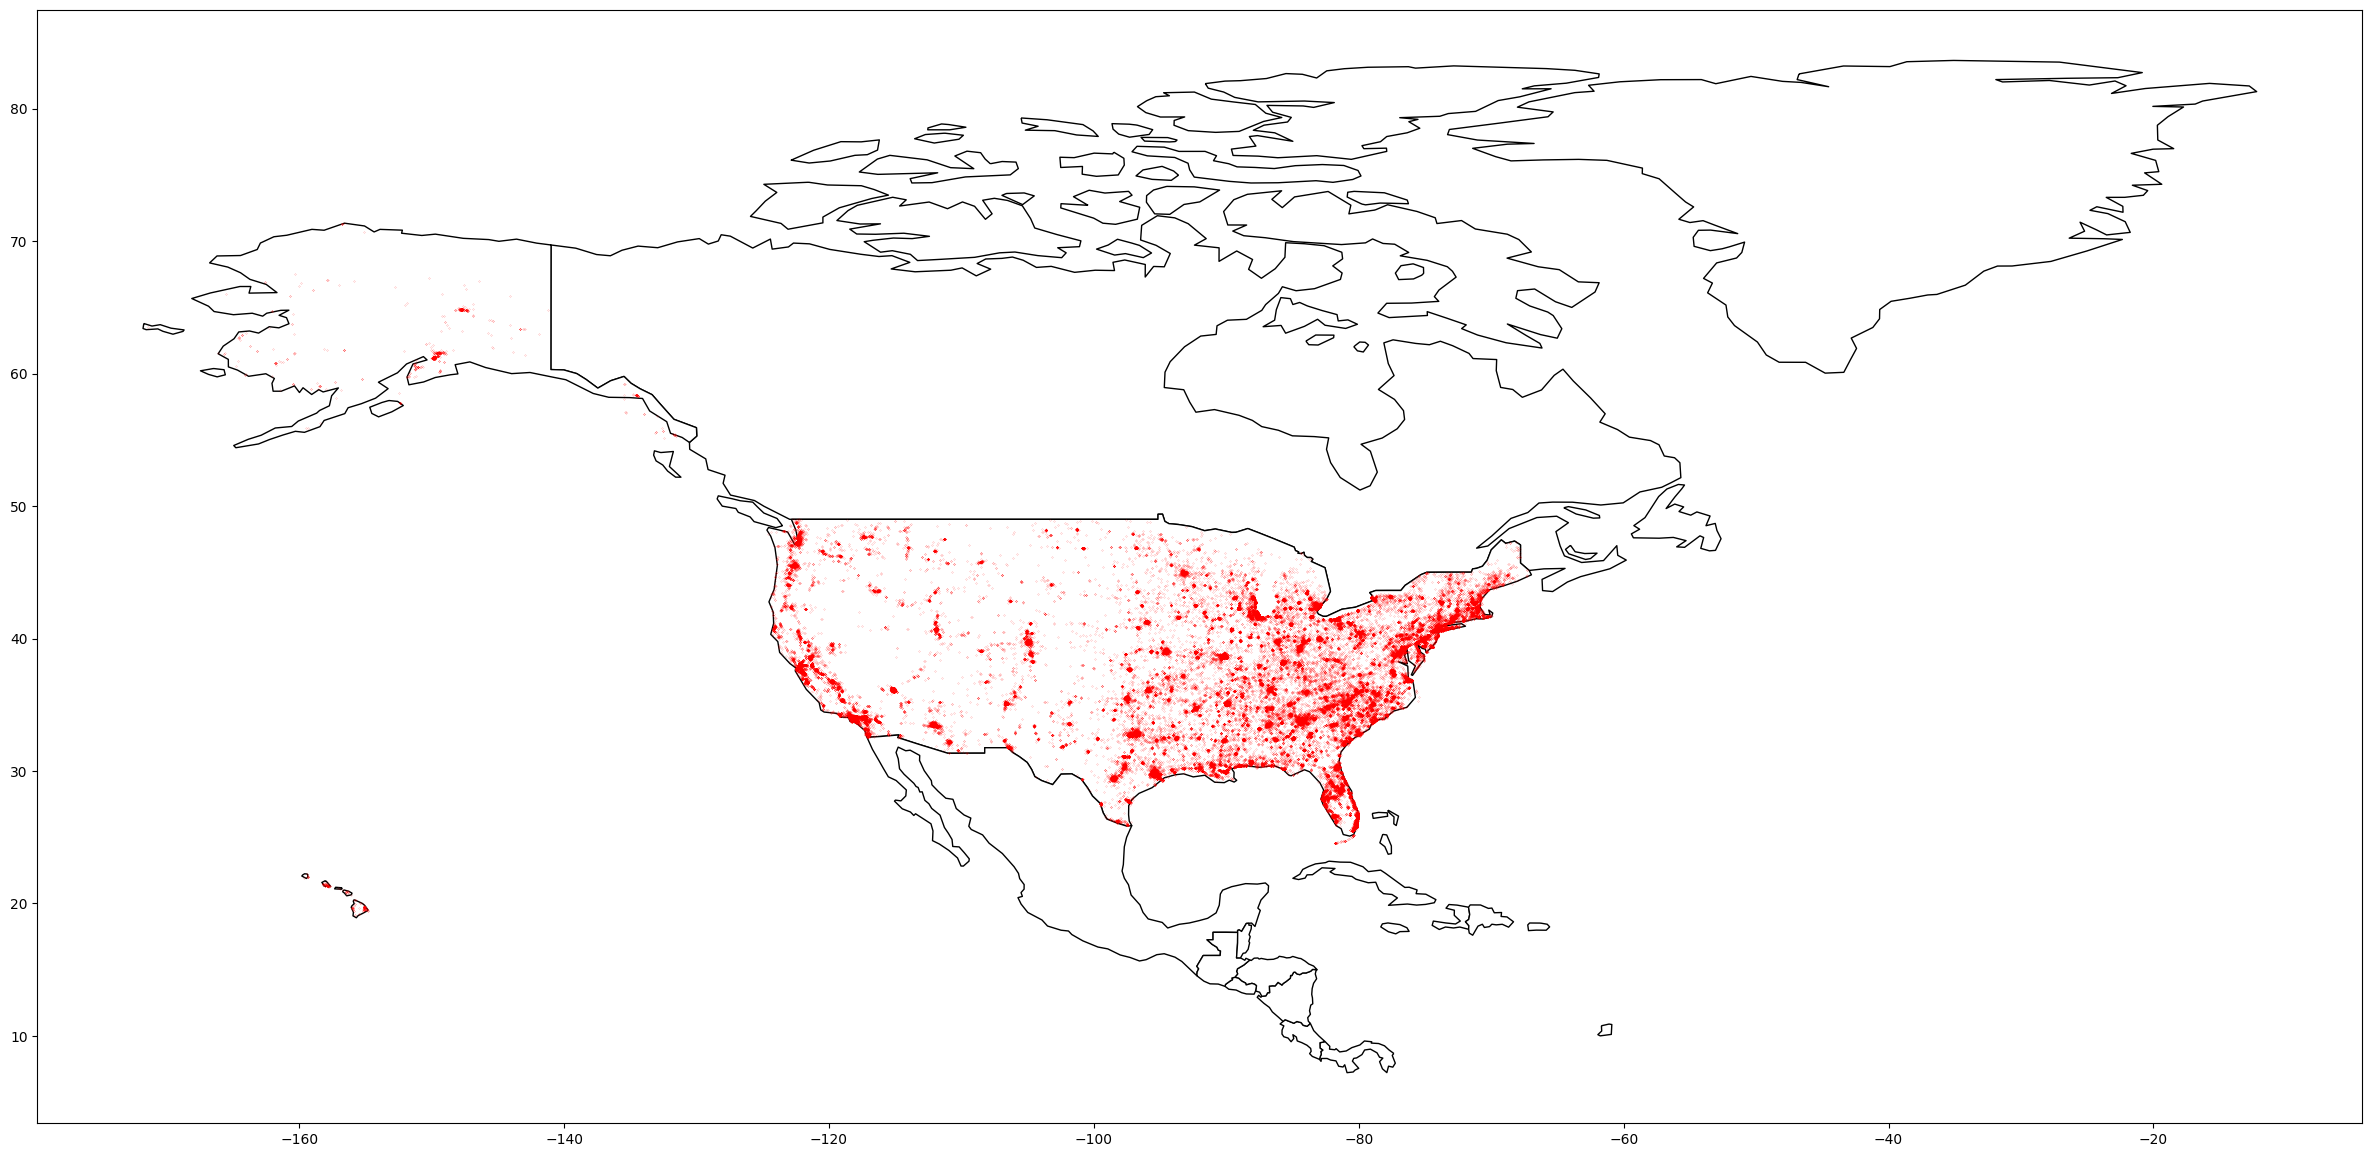

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carica la mappa del North America
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa = world[world.continent == "North America"]

gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

fig, ax = plt.subplots(figsize=(30, 30))

# Disegna la mappa degli Stati Uniti
usa.plot(ax=ax, color='white', edgecolor='black')

gdf.plot(ax=ax, marker='o', color='red', markersize=0.01)
plt.show()


### participant_age1
Random partecipant's age, non sono presenti stringhe 

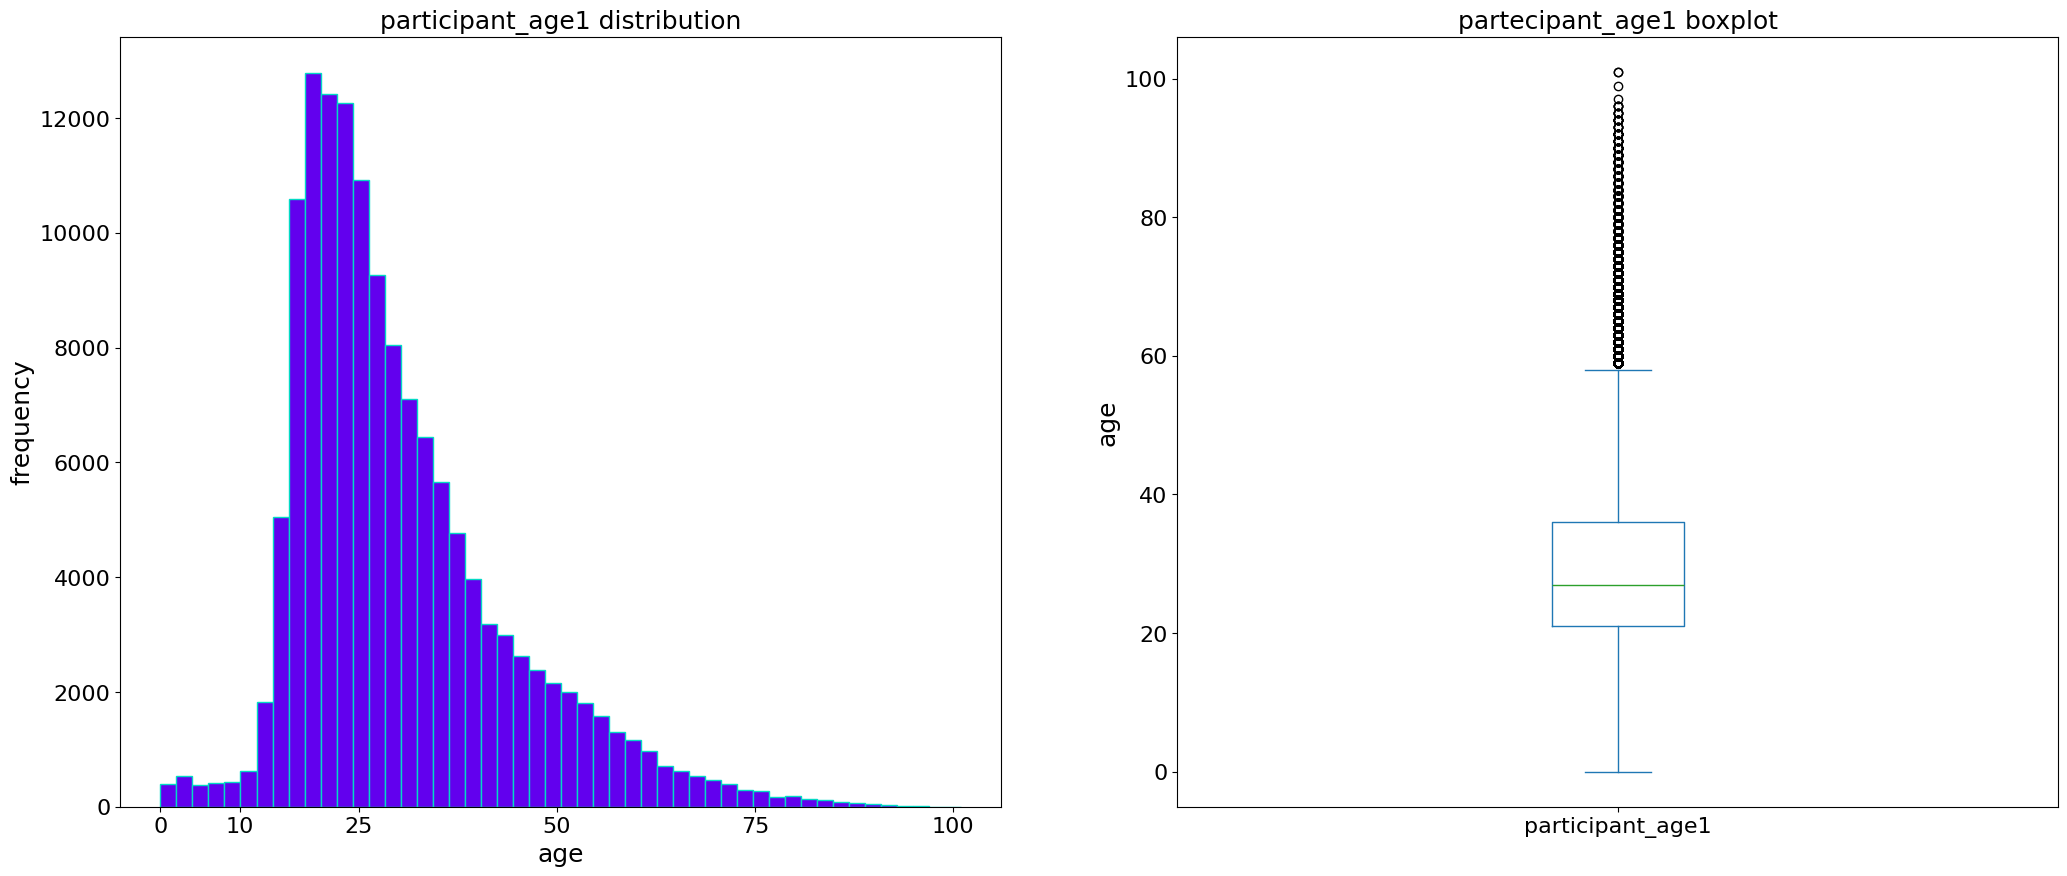

In [8]:
dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=data["participant_age1"].plot(bins=50,kind="hist",title="participant_age1 distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_xticks([0,10,25,50,75,100])
ax.set_xticklabels([0,10,25,50,75,100])
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("age",fontsize=18)

plt.subplot2grid(dim,(0,1))
ax2 = data["participant_age1"].plot(kind="box",fontsize=16)
ax2.set_title("partecipant_age1 boxplot")
ax2.title.set_size(18)
ax2.set_ylabel("age", fontsize=18)


plt.show()

### participant_age_group1
Random partecipant age group, non sono presenti valori oltre quelli rappresentati

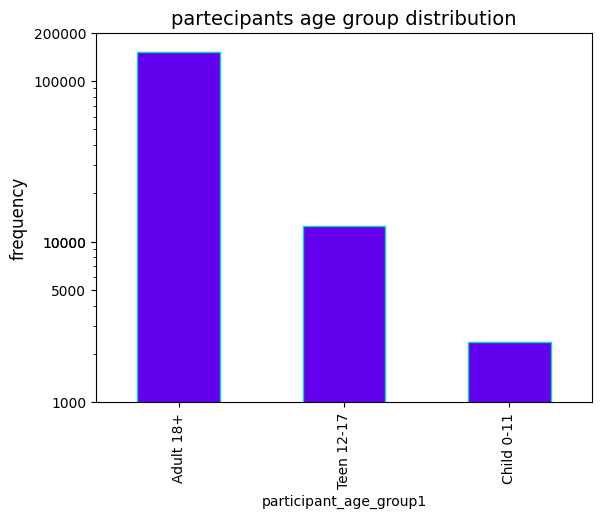

In [9]:
ageGroup= data["participant_age_group1"].value_counts()
ax=ageGroup.plot(kind="bar", color=color,edgecolor=edgecolor,fontsize=10,title="partecipants age group distribution")
ax.title.set_size(14)
ax.set_yscale("log")
ax.set_ylabel("frequency",fontsize=12)
ax.set_yticks([1000,5000,10000,10000,100000,200000])
ax.set_yticklabels([1000,5000,10000,10000,100000,200000])
plt.show()

### participant_gender1

Text(0, 0.5, 'frequency')

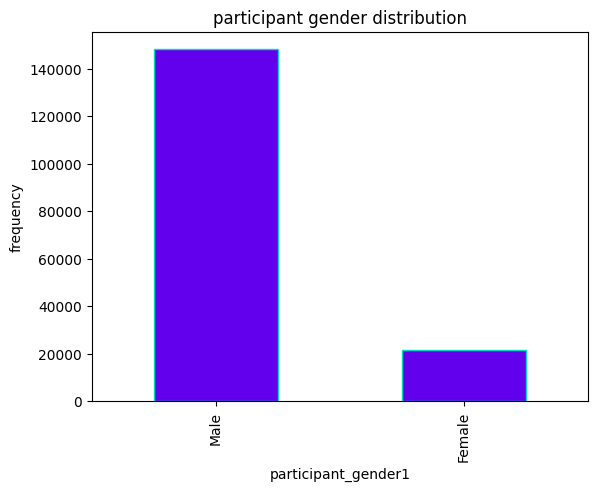

In [10]:
partGender=data["participant_gender1"]
partGender= partGender.replace("Male, female", "Male")
ax= partGender.value_counts().plot(kind="bar",stacked=False, color=color,edgecolor=edgecolor,fontsize=10,title="participant gender distribution")
ax.title.set_size(12)
ax.set_ylabel("frequency")

### min/max/avg_age_participants

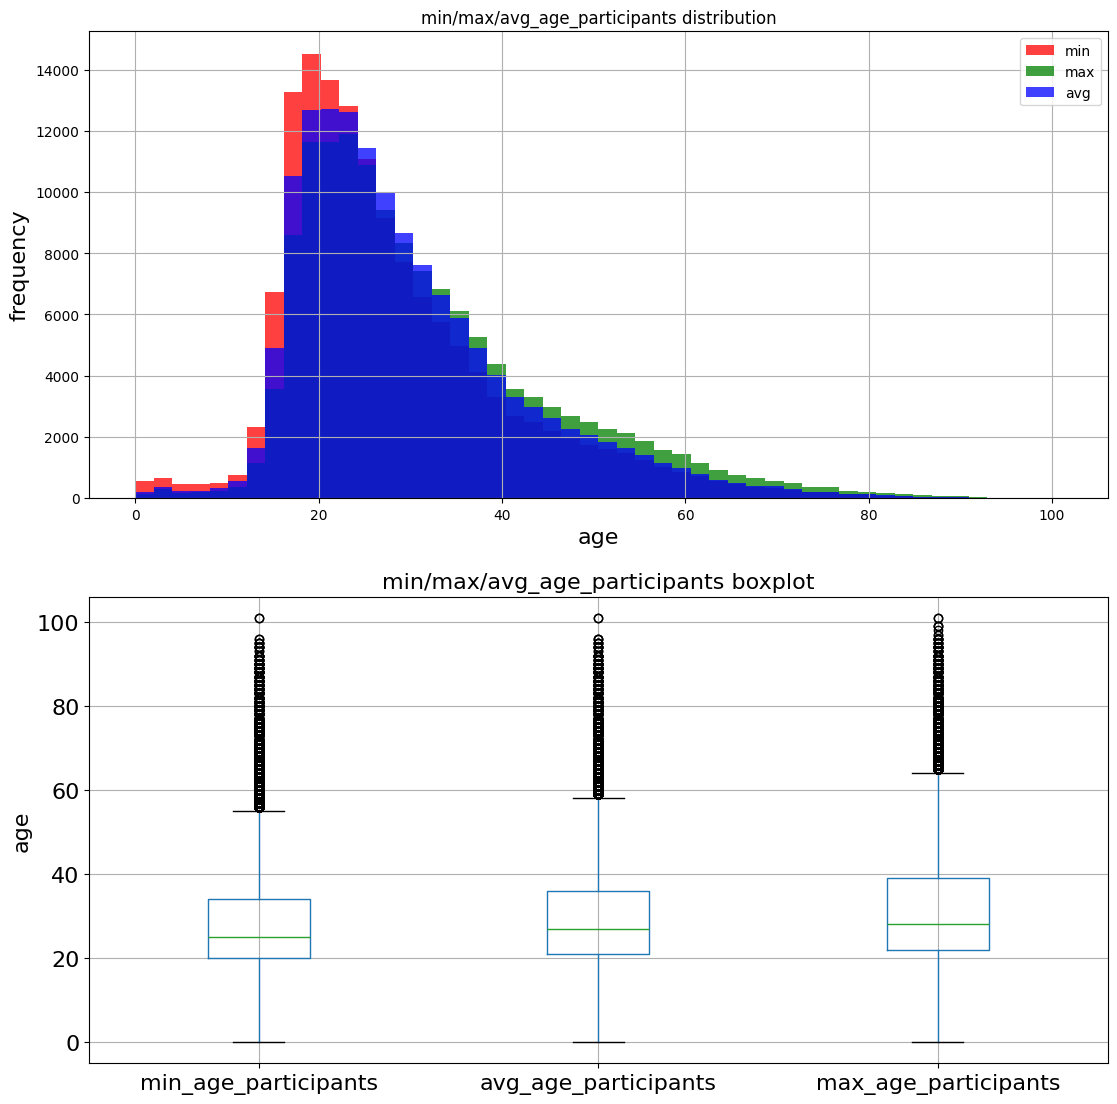

In [11]:
fig,(ax,ax2)= plt.subplots(nrows=2,ncols=1,figsize=(12,12))
fig.tight_layout(pad=5.0)
bins=50
data["min_age_participants"].hist(bins=bins, alpha=0.75,label="min",color="red",ax=ax)
data["max_age_participants"].hist(bins=bins, alpha=0.75,label="max",color="green",ax=ax)
data["avg_age_participants"].hist(bins=bins, alpha=0.75,label="avg",color="blue",ax=ax)
ax.legend(loc="upper right")
ax.title.set_size(18)
ax.set_ylabel("frequency",fontsize=16)
ax.set_xlabel("age",fontsize=16)
ax.set_title("min/max/avg_age_participants distribution")

data.boxplot(column=["min_age_participants","avg_age_participants","max_age_participants"],ax=ax2,fontsize=16)
ax2.set_title("min/max/avg_age_participants boxplot")
ax2.set_ylabel("age",fontsize=16)
ax2.title.set_size(16)

plt.show()

### n_participants_child

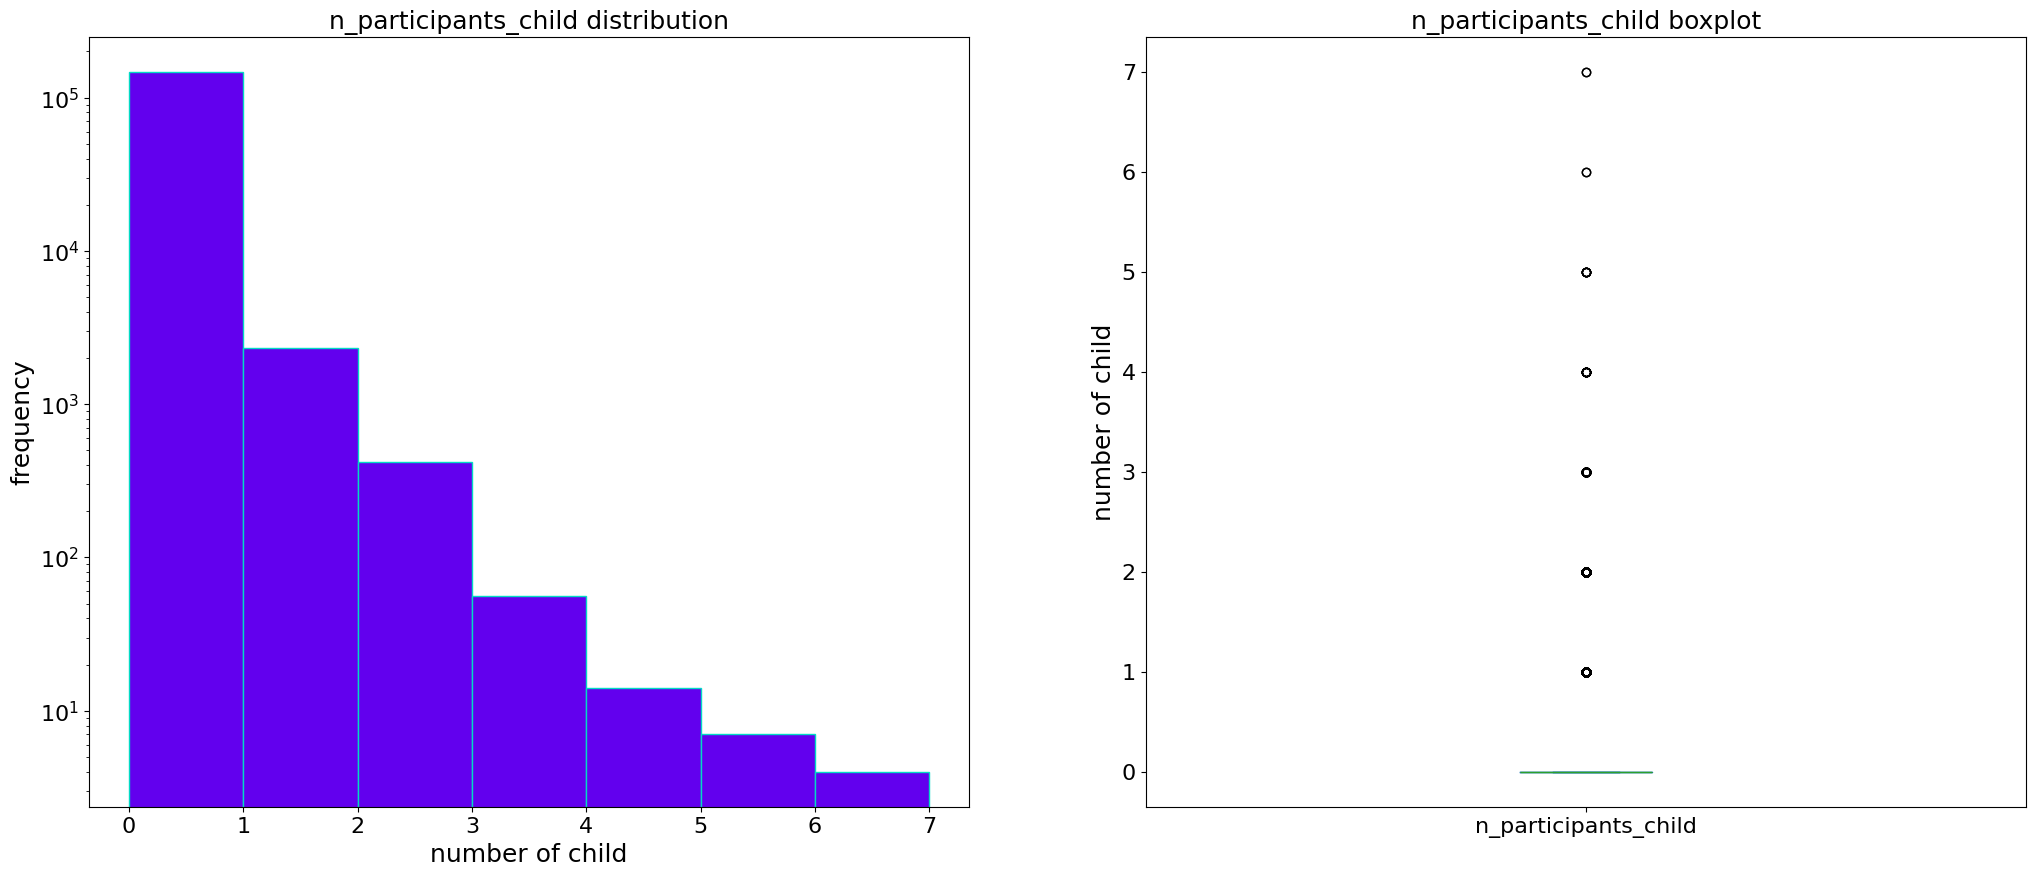

In [12]:
npartChild= data["n_participants_child"]

dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=npartChild.plot(bins=7,kind="hist",title="n_participants_child distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("number of child",fontsize=18)
plt.subplot2grid(dim,(0,1))

ax2=npartChild.plot(kind="box",fontsize=16)
ax2.set_title("n_participants_child boxplot")
ax2.set_ylabel("number of child",fontsize=18)
ax2.title.set_size(18)


plt.show()


### n_participants_teen
number of teen participants 12-17. Valgono le cose scritte per l'attributo precedente.

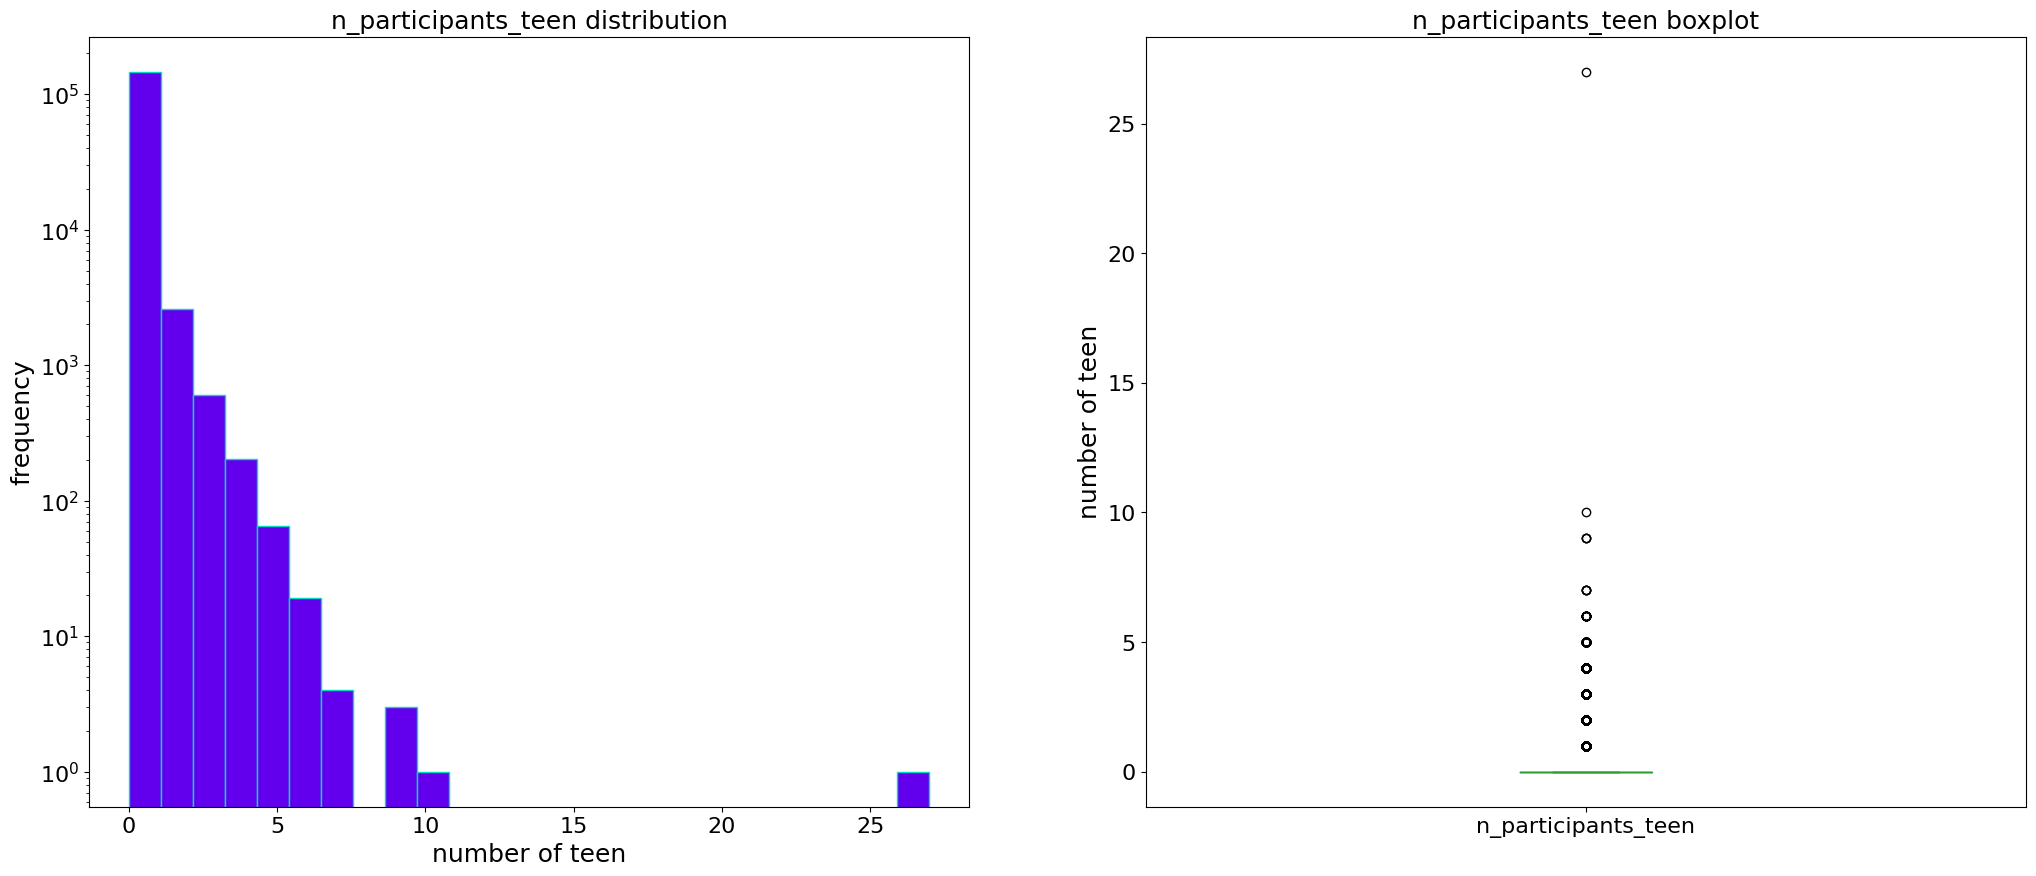

In [13]:
npartTeen= data["n_participants_teen"]

dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=npartTeen.plot(bins=25,kind="hist",title="n_participants_teen distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("number of teen",fontsize=18)
plt.subplot2grid(dim,(0,1))

ax2=npartTeen.plot(kind="box",fontsize=16)
ax2.set_title("n_participants_teen boxplot")
ax2.set_ylabel("number of teen",fontsize=18)
ax2.title.set_size(18)

plt.show()

### n_participants_adult


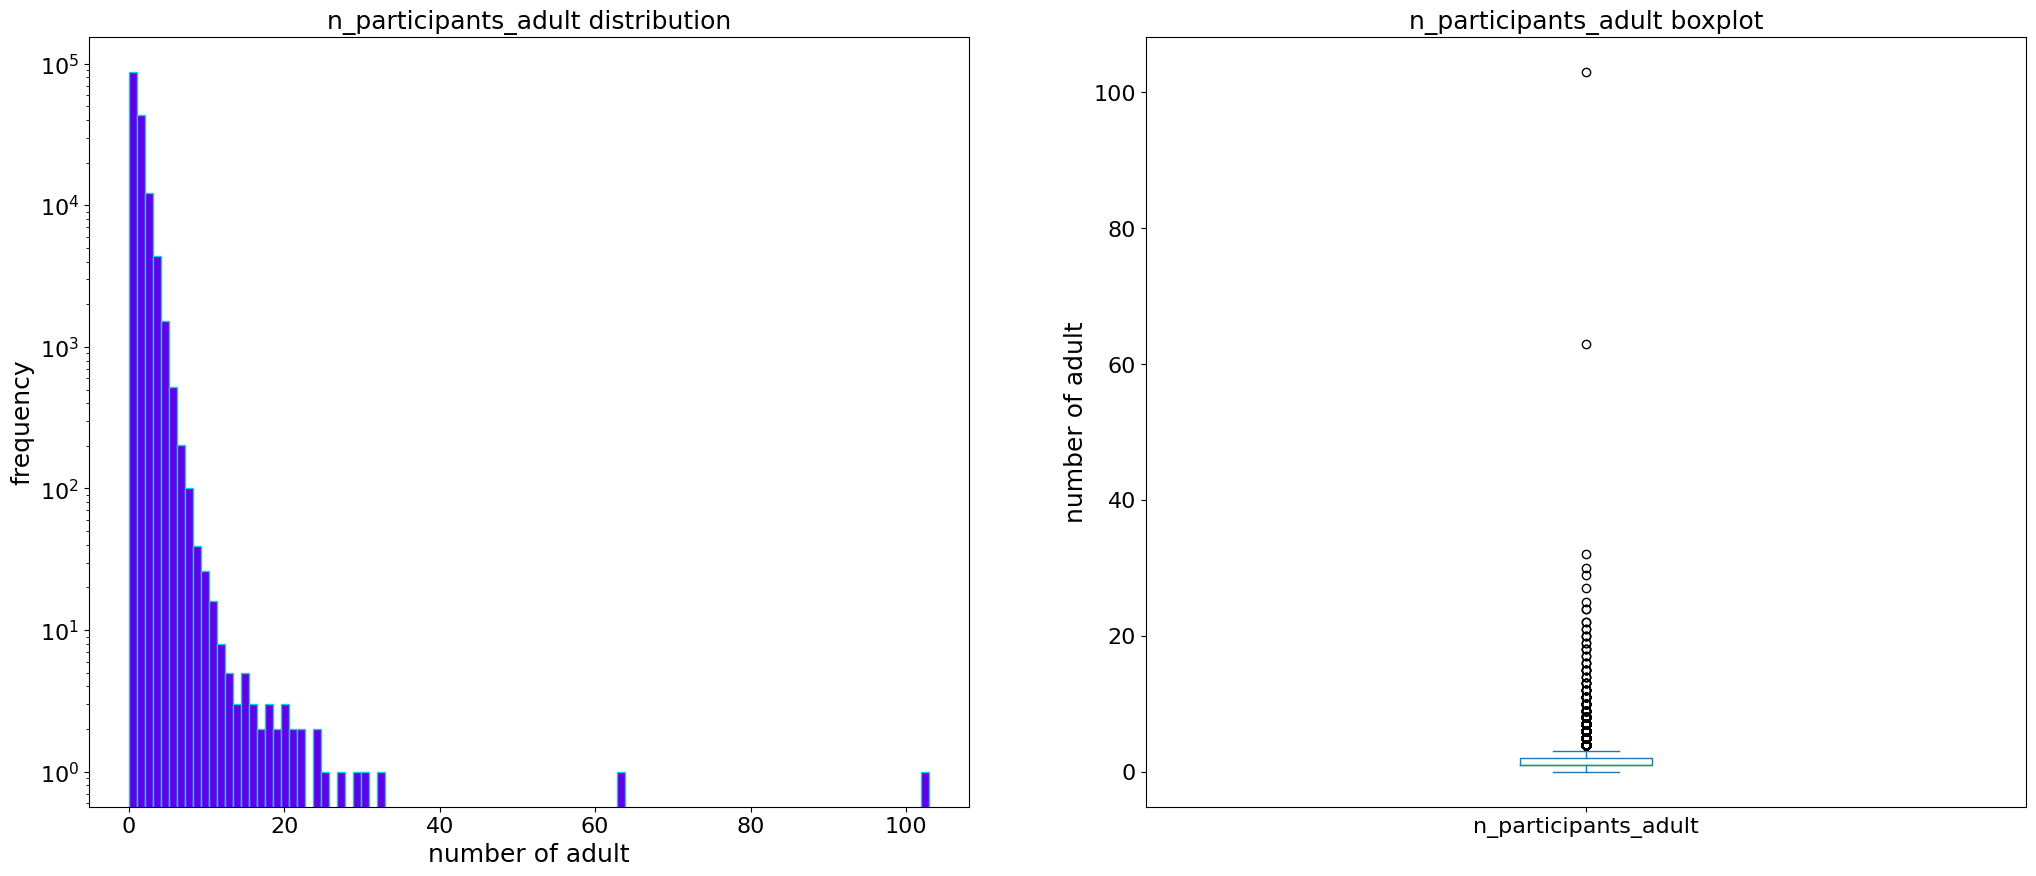

In [14]:
npartAdult= data["n_participants_adult"]

dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=npartAdult.plot(bins=100,kind="hist",title="n_participants_adult distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("number of adult",fontsize=18)
plt.subplot2grid(dim,(0,1))

ax2=npartAdult.plot(kind="box",fontsize=16)
ax2.set_title("n_participants_adult boxplot")
ax2.set_ylabel("number of adult",fontsize=18)
ax2.title.set_size(18)


plt.show()

### n_males.
number of males participants. Non sono presenti valori stringhe.

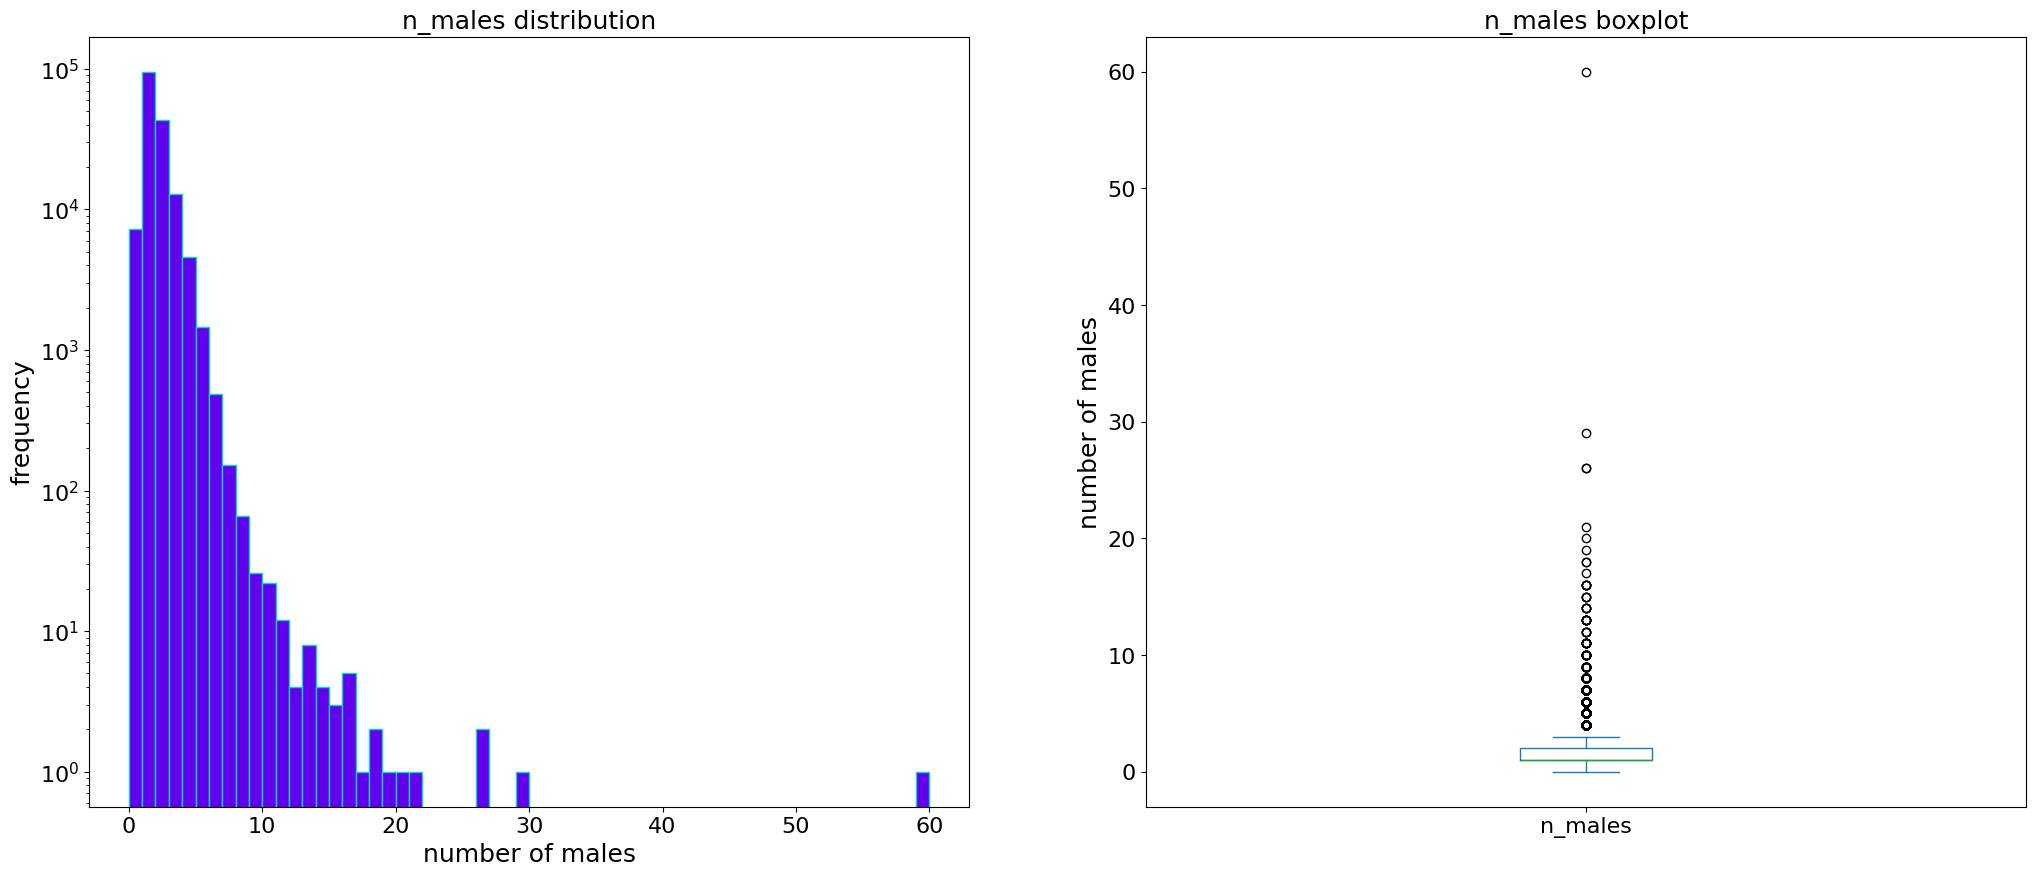

In [15]:
nMales= data["n_males"]

dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=nMales.plot(bins= 60,kind="hist",title= "n_males distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("number of males",fontsize=18)
plt.subplot2grid(dim,(0,1))

ax2=nMales.plot(kind="box",fontsize=16)
ax2.set_title("n_males boxplot")
# ax2.set_yscale("log")
ax2.set_ylabel("number of males",fontsize=18)
ax2.title.set_size(18)

plt.show()

 ### n_females
 number of females participants.

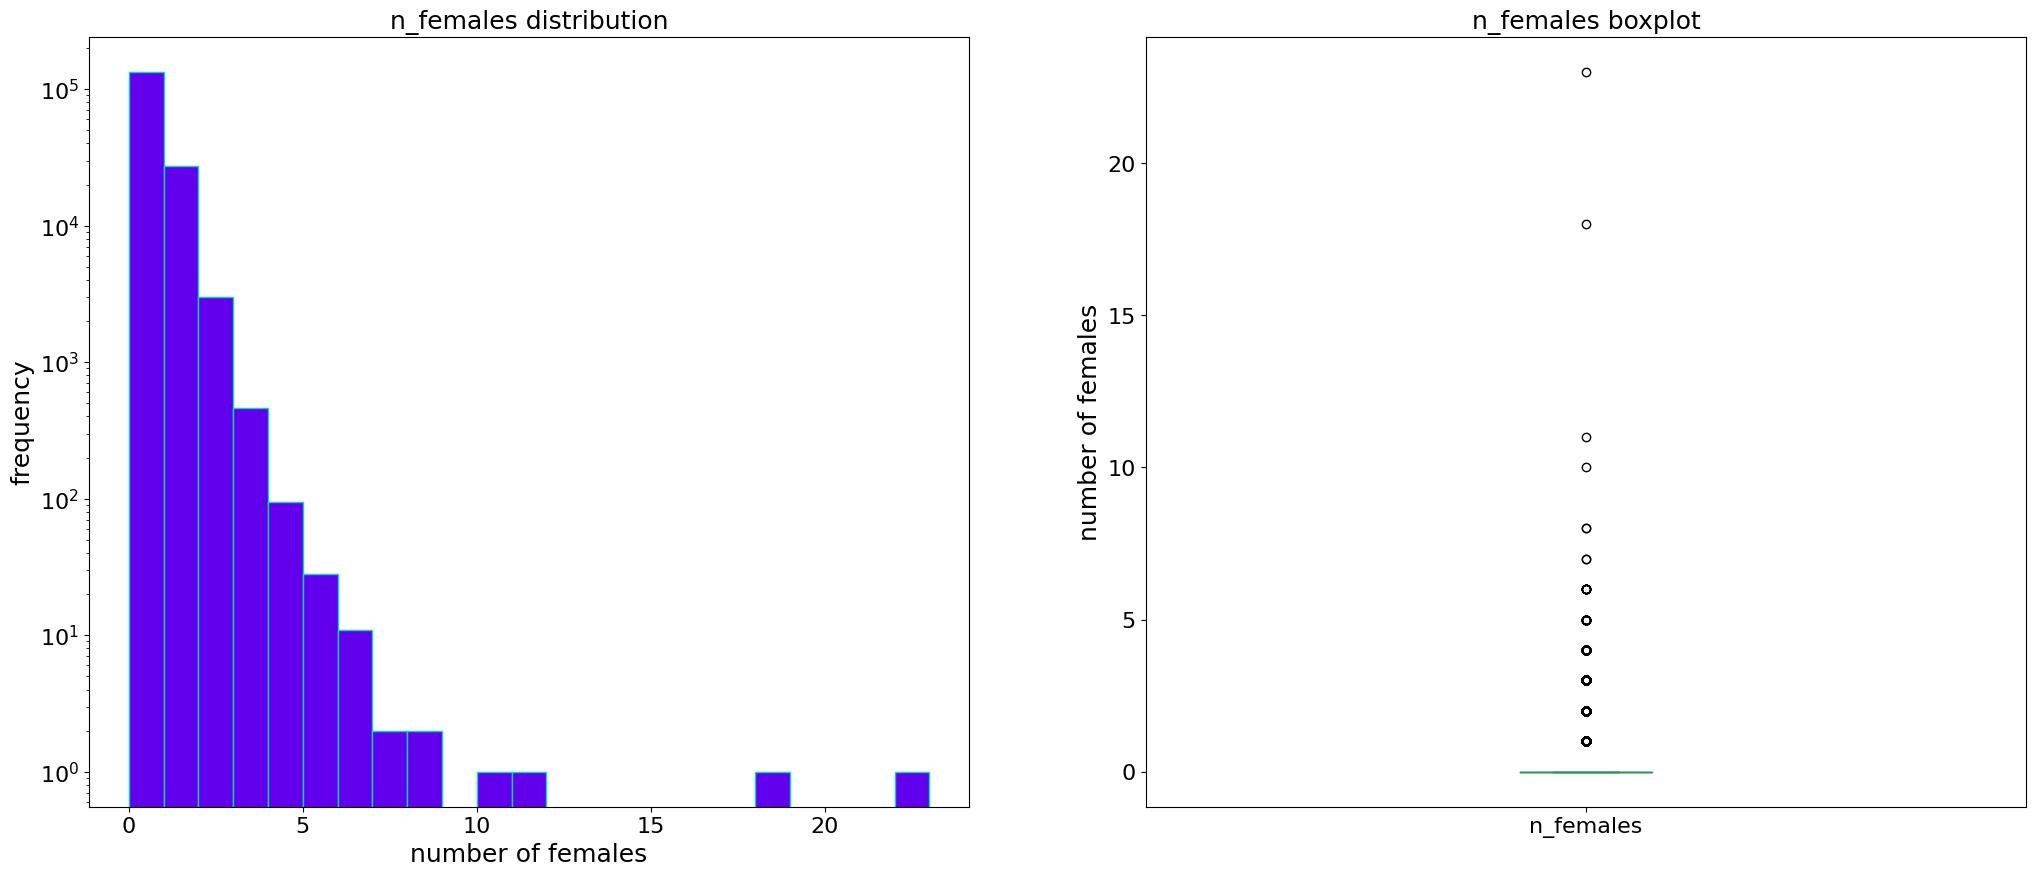

In [16]:
nFemales= data["n_females"]

dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=nFemales.plot(bins= 23, kind="hist",title= "n_females distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("number of females",fontsize=18)
plt.subplot2grid(dim,(0,1))

ax2=nFemales.plot(kind="box",fontsize=16)
ax2.set_title("n_females boxplot")
ax2.set_ylabel("number of females",fontsize=18)
ax2.title.set_size(18)

plt.show()

# n_males/n_females

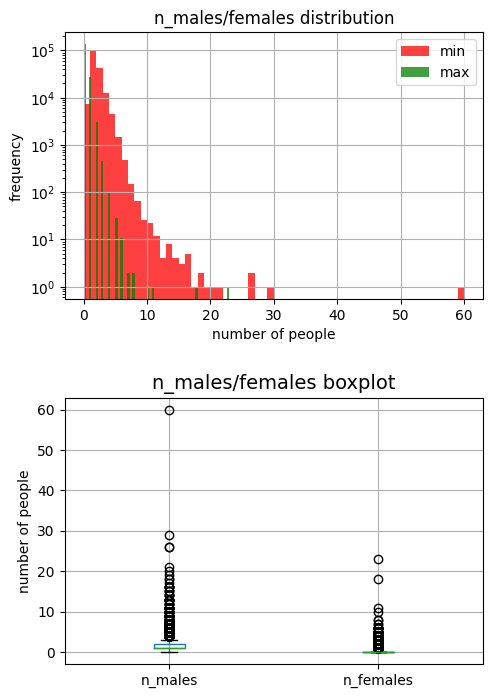

In [17]:
fig,(ax,ax2)= plt.subplots(nrows=2,ncols=1,figsize=(6,8))
fig.tight_layout(pad=5.0)
bins=60
data["n_males"].hist(bins=bins, alpha=0.75,label="min",color="red",ax=ax)
data["n_females"].hist(bins=bins, alpha=0.75,label="max",color="green",ax=ax)
ax.legend(loc="upper right")
ax.title.set_size(14)
ax.set_ylabel("frequency",fontsize=10)
ax.set_xlabel("number of people",fontsize=10)
ax.set_title("n_males/females distribution")
ax.set_yscale("log")

data.boxplot(column=["n_males","n_females"],ax=ax2,fontsize=10)
ax2.set_title("n_males/females boxplot")
ax2.set_ylabel("number of people",fontsize=10)
ax2.title.set_size(14)

plt.show()

### n_killed
number of people killed.

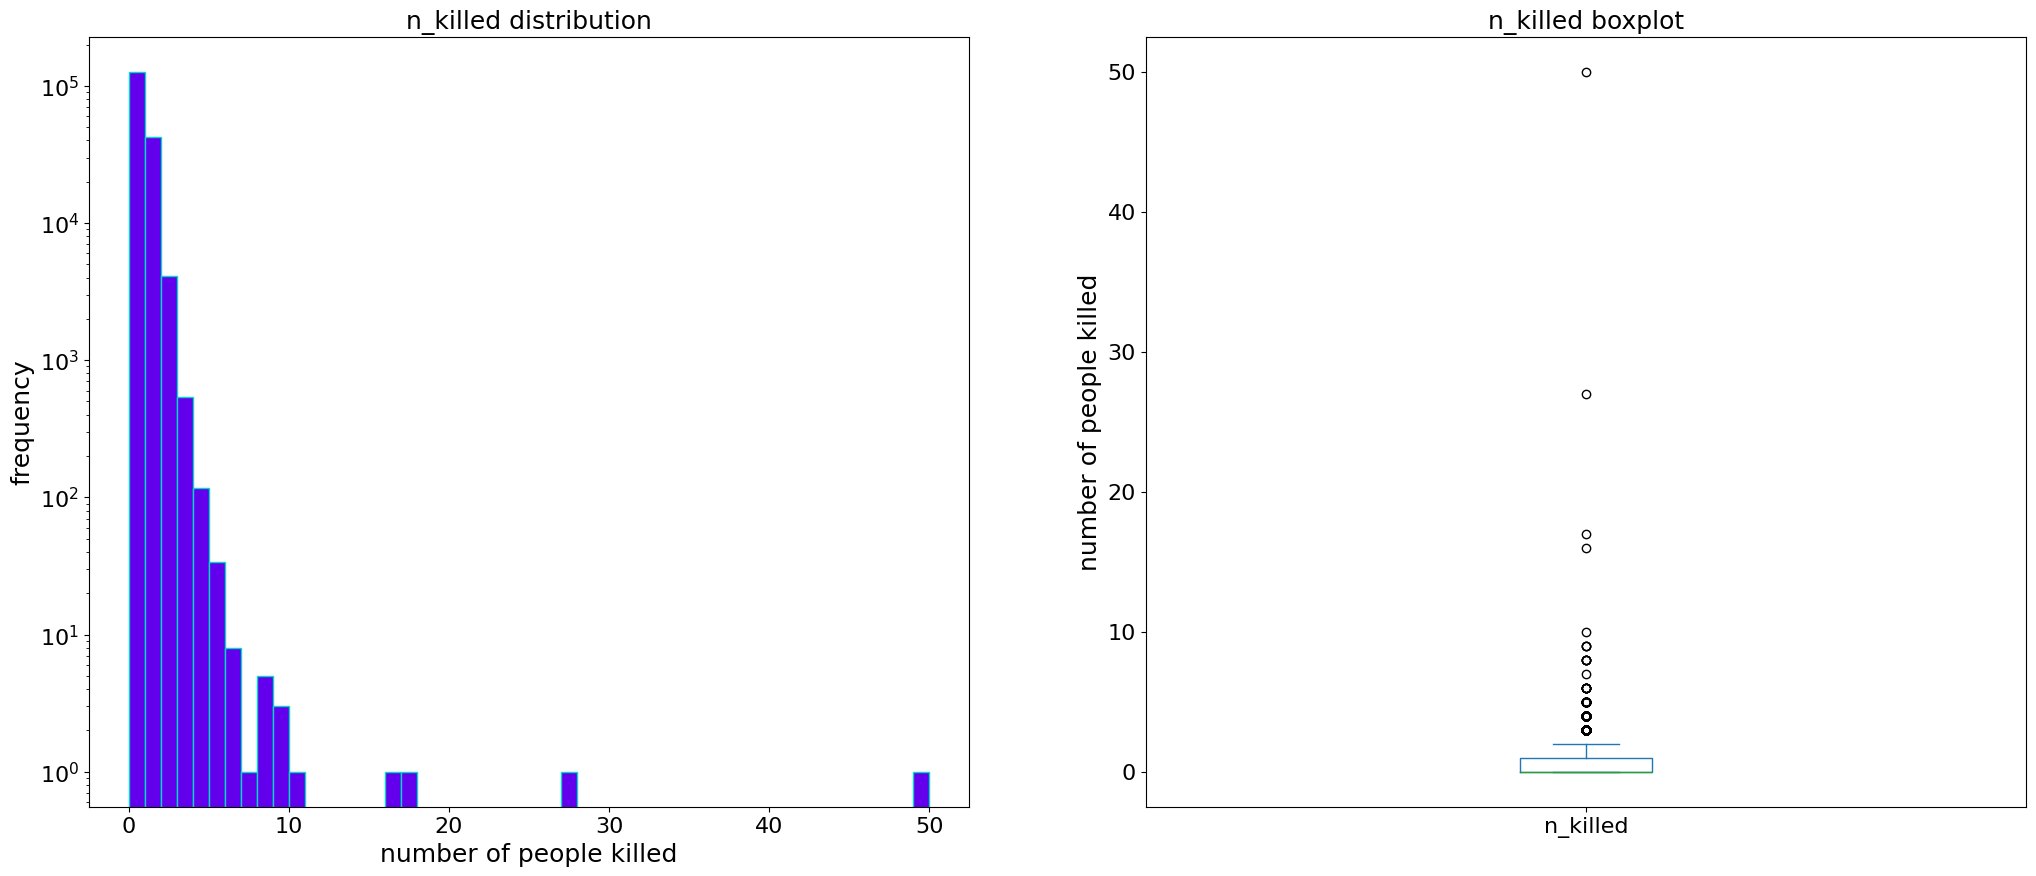

In [18]:
nKilled= data["n_killed"]

dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=nKilled.plot(bins=50,kind="hist",title= "n_killed distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("number of people killed",fontsize=18)
plt.subplot2grid(dim,(0,1))

ax2=nKilled.plot(kind="box",fontsize=16)
ax2.set_title("n_killed boxplot")

ax2.set_ylabel("number of people killed",fontsize=18)
ax2.title.set_size(18)

plt.show()

### n_injured
number of people injured.

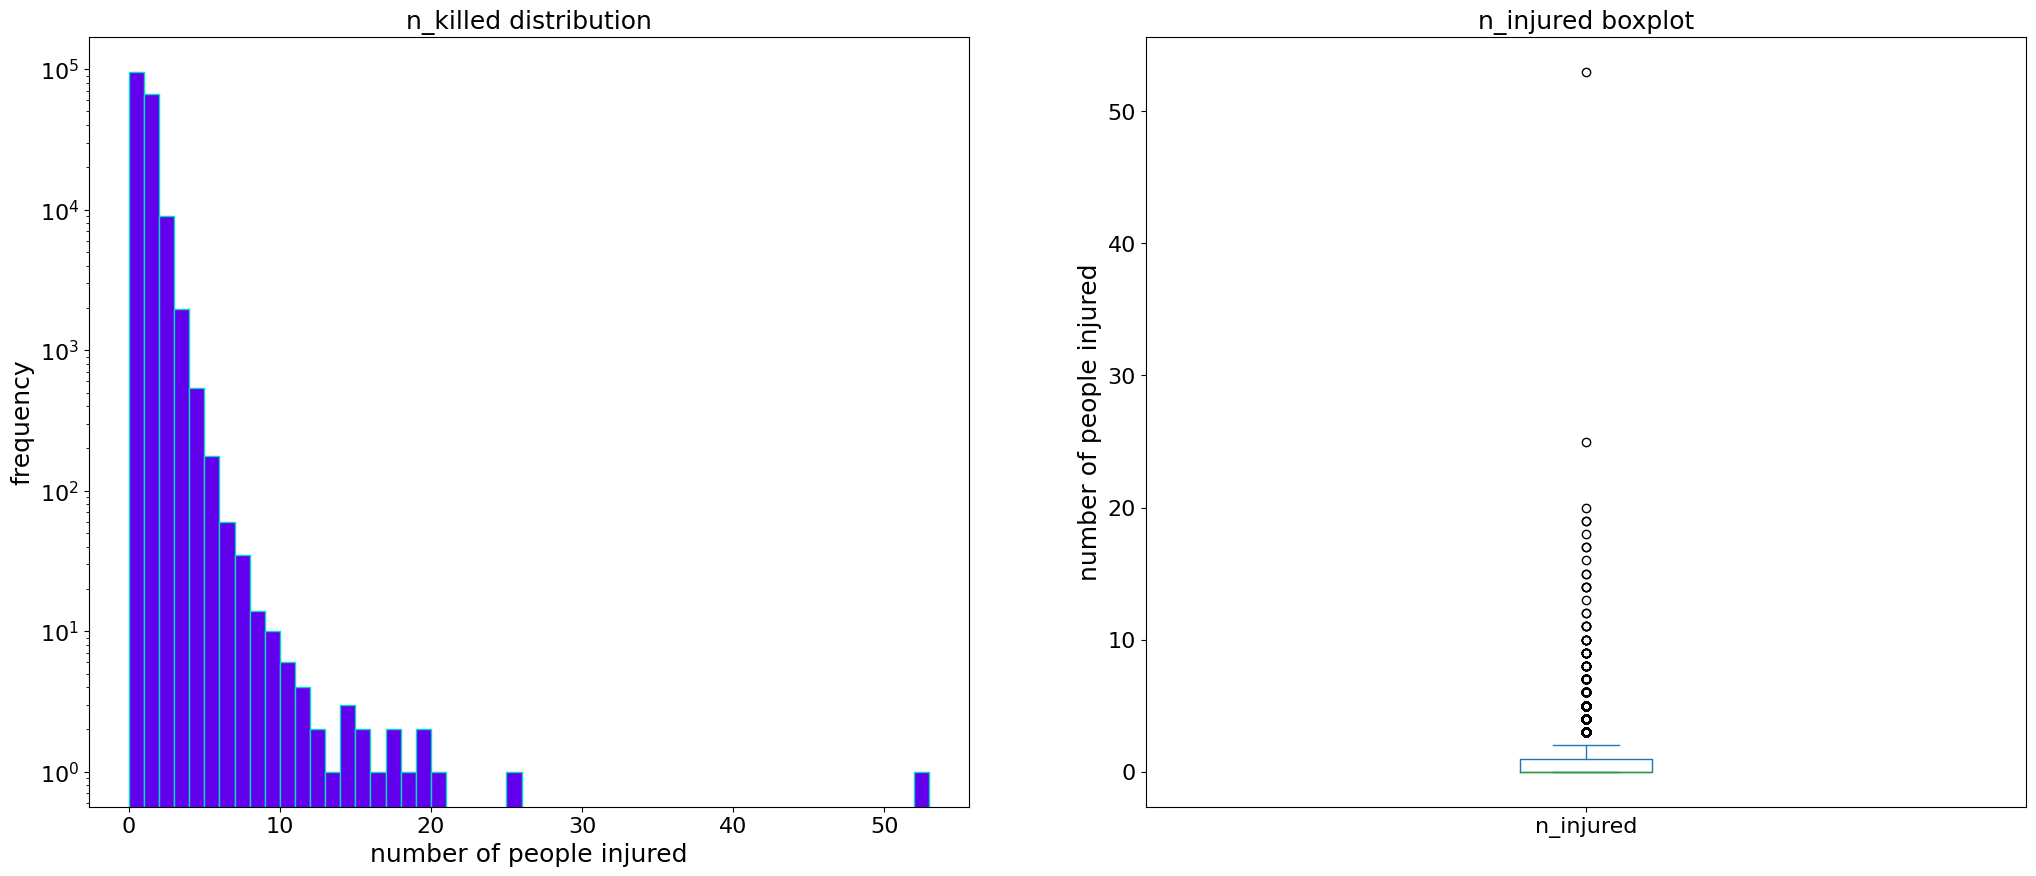

In [19]:
nInjured= data["n_injured"]

dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=nInjured.plot(bins=53,kind="hist",title= "n_killed distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("number of people injured",fontsize=18)
plt.subplot2grid(dim,(0,1))

ax2=nInjured.plot(kind="box",fontsize=16)
ax2.set_title("n_injured boxplot")
ax2.set_ylabel("number of people injured",fontsize=18)
ax2.title.set_size(18)

plt.show()

###  n_arrested
number of arrested participants

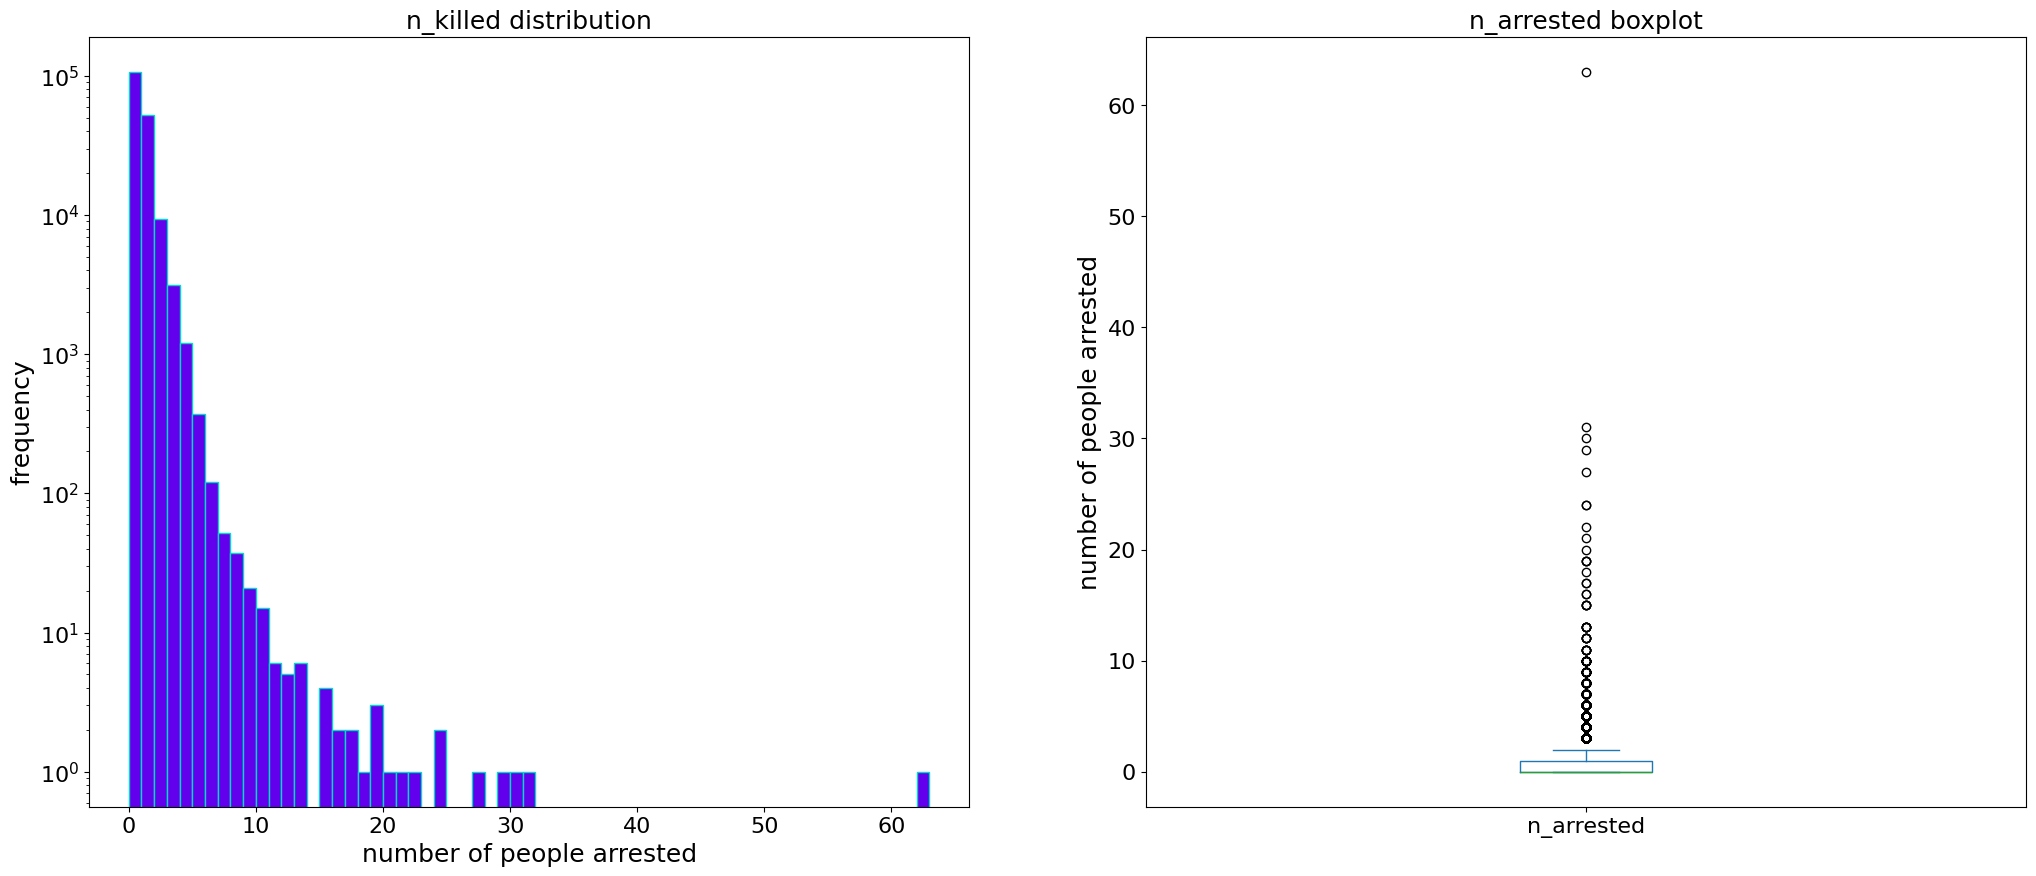

In [20]:
nArrested= data["n_arrested"]

dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=nArrested.plot(bins=63,kind="hist",title= "n_killed distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("number of people arrested",fontsize=18)
plt.subplot2grid(dim,(0,1))

ax2=nArrested.plot(kind="box",fontsize=16)
ax2.set_title("n_arrested boxplot")
ax2.set_ylabel("number of people arrested",fontsize=18)
ax2.title.set_size(18)

plt.show()

### n_unharmed
number of unharmed participants. Non sono presenti valori string.

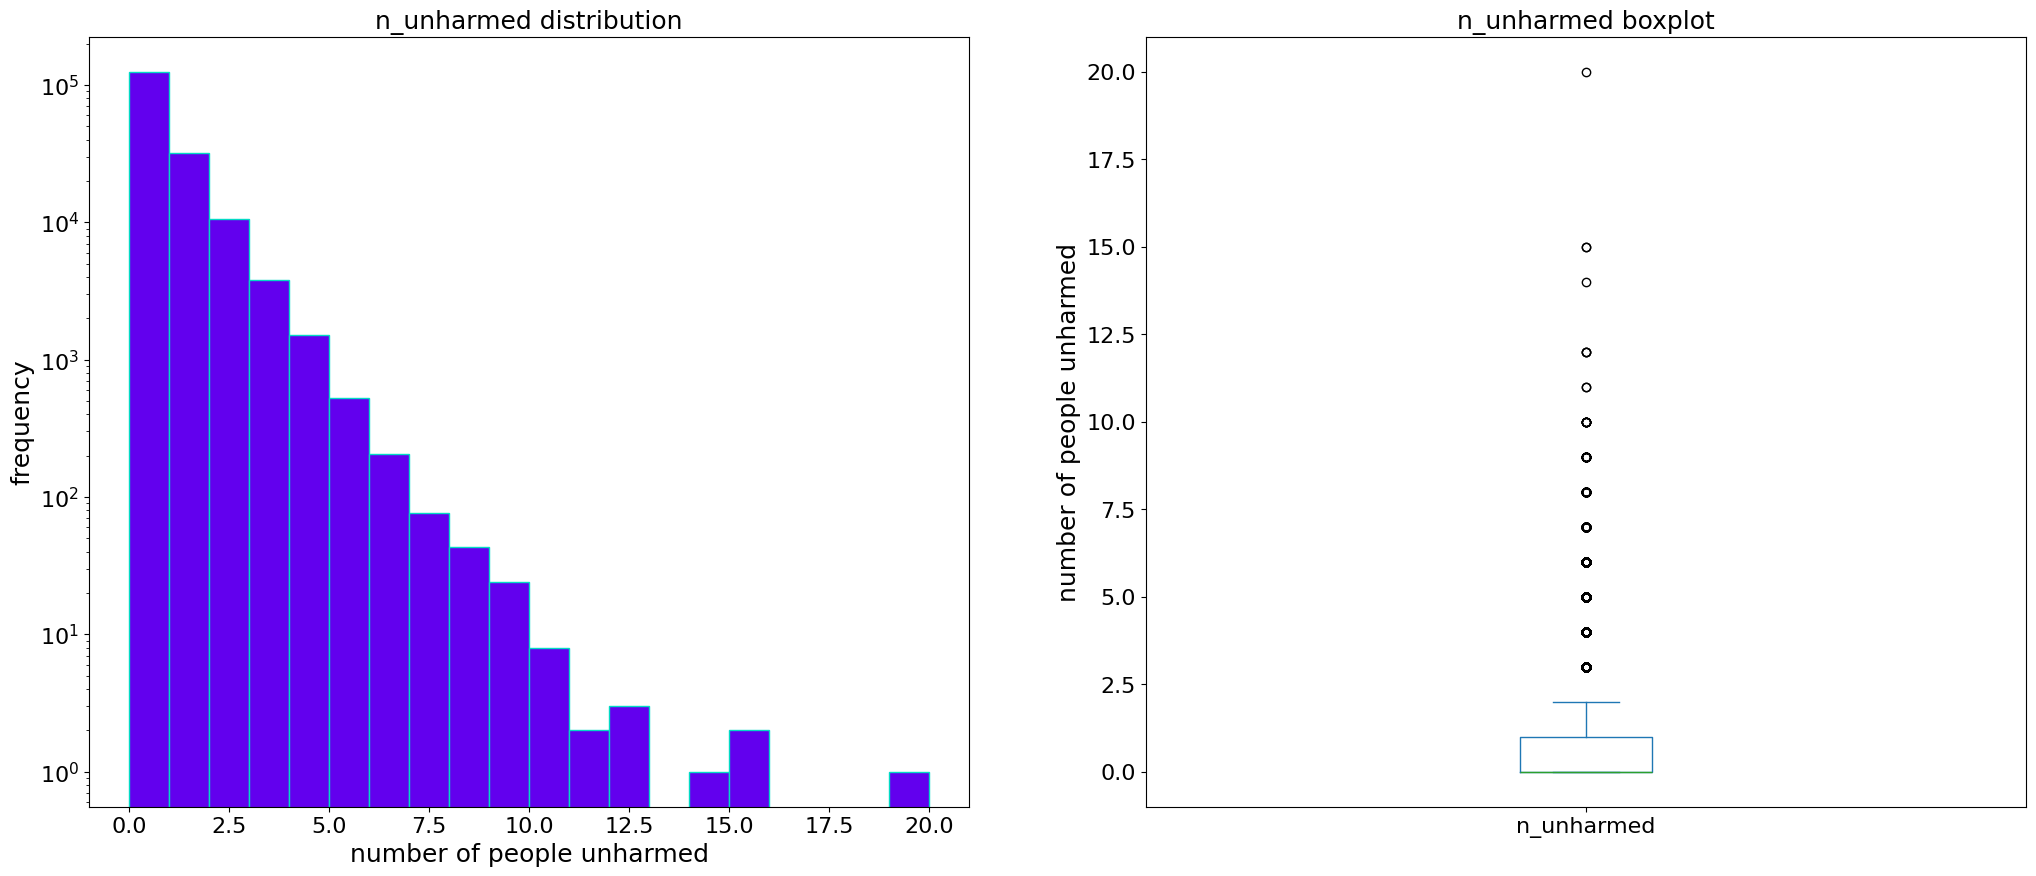

In [21]:
nUnharmed= data["n_unharmed"]

dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=nUnharmed.plot(bins=20,kind="hist",title= "n_unharmed distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("number of people unharmed",fontsize=18)
plt.subplot2grid(dim,(0,1))

ax2=nUnharmed.plot(kind="box",fontsize=16)
ax2.set_title("n_unharmed boxplot")
ax2.set_ylabel("number of people unharmed",fontsize=18)
ax2.title.set_size(18)

plt.show()

### n_killed/injured/arrested/unharmed

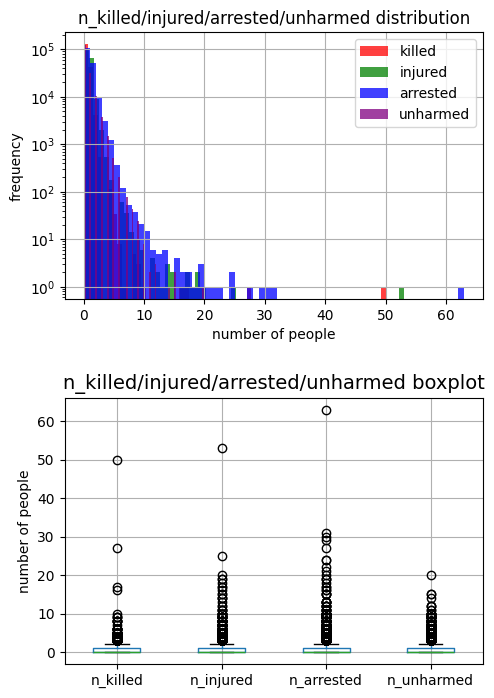

In [22]:
fig,(ax,ax2)= plt.subplots(nrows=2,ncols=1,figsize=(6,8))
fig.tight_layout(pad=5.0)
bins=63
data["n_killed"].hist(bins=bins, alpha=0.75,label="killed",color="red",ax=ax)
data["n_injured"].hist(bins=bins, alpha=0.75,label="injured",color="green",ax=ax)
data["n_arrested"].hist(bins=bins, alpha=0.75,label="arrested",color="blue",ax=ax)
data["n_unharmed"].hist(bins=bins, alpha=0.75,label="unharmed",color="purple",ax=ax)
ax.legend(loc="upper right")
ax.title.set_size(14)
ax.set_ylabel("frequency",fontsize=10)
ax.set_xlabel("number of people",fontsize=10)
ax.set_title("n_killed/injured/arrested/unharmed distribution")
ax.set_yscale("log")

data.boxplot(column=["n_killed","n_injured","n_arrested","n_unharmed"],ax=ax2,fontsize=10)
ax2.set_title("n_killed/injured/arrested/unharmed boxplot")
ax2.set_ylabel("number of people",fontsize=10)
ax2.title.set_size(14)

plt.show()

### n_participants
number of participants in the incident

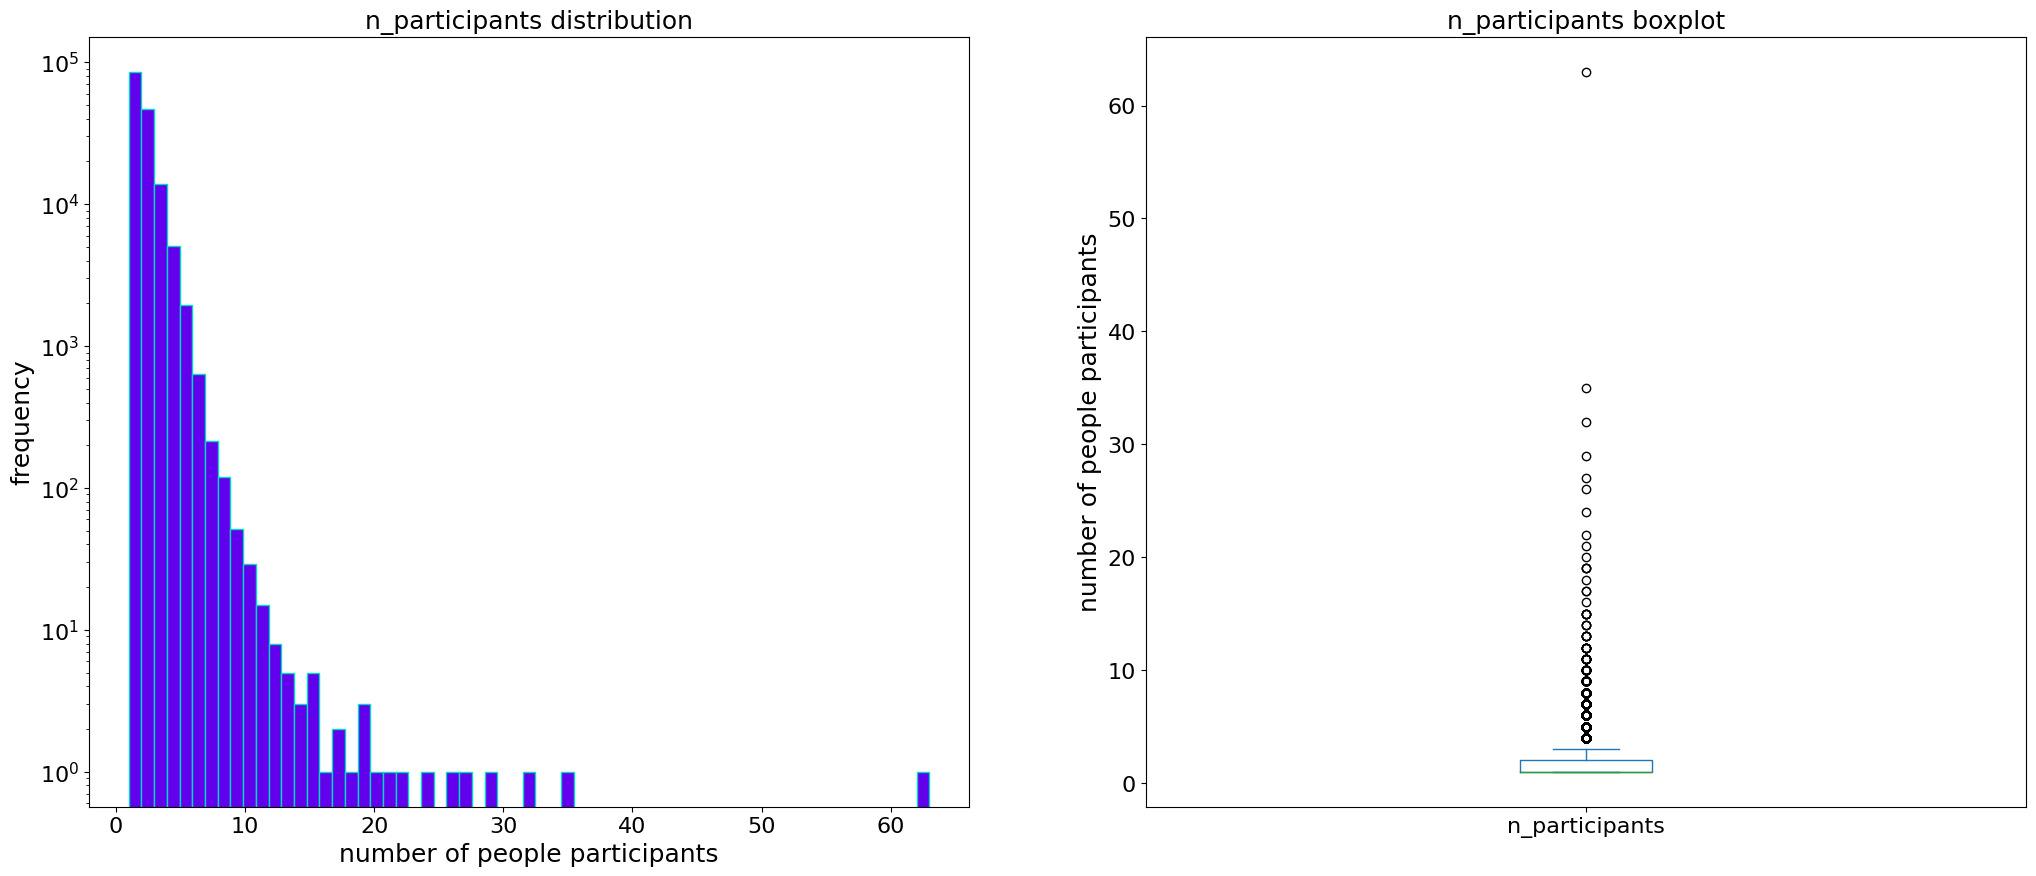

In [23]:
nParticipants= data["n_participants"]

dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=nParticipants.plot(bins=63,kind="hist",title= "n_participants distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("number of people participants",fontsize=18)
plt.subplot2grid(dim,(0,1))

ax2=nParticipants.plot(kind="box",fontsize=16)
ax2.set_title("n_participants boxplot")
ax2.set_ylabel("number of people participants",fontsize=18)
ax2.title.set_size(18)

plt.show()

### incidents characteristic1 e 2
dato categorico. Incidents caracteristc2 è stato analizzato ma i dati più frequenti non sono ritenuti interessanti ai fini dell'analisi quindi l'attributo viene droppato.

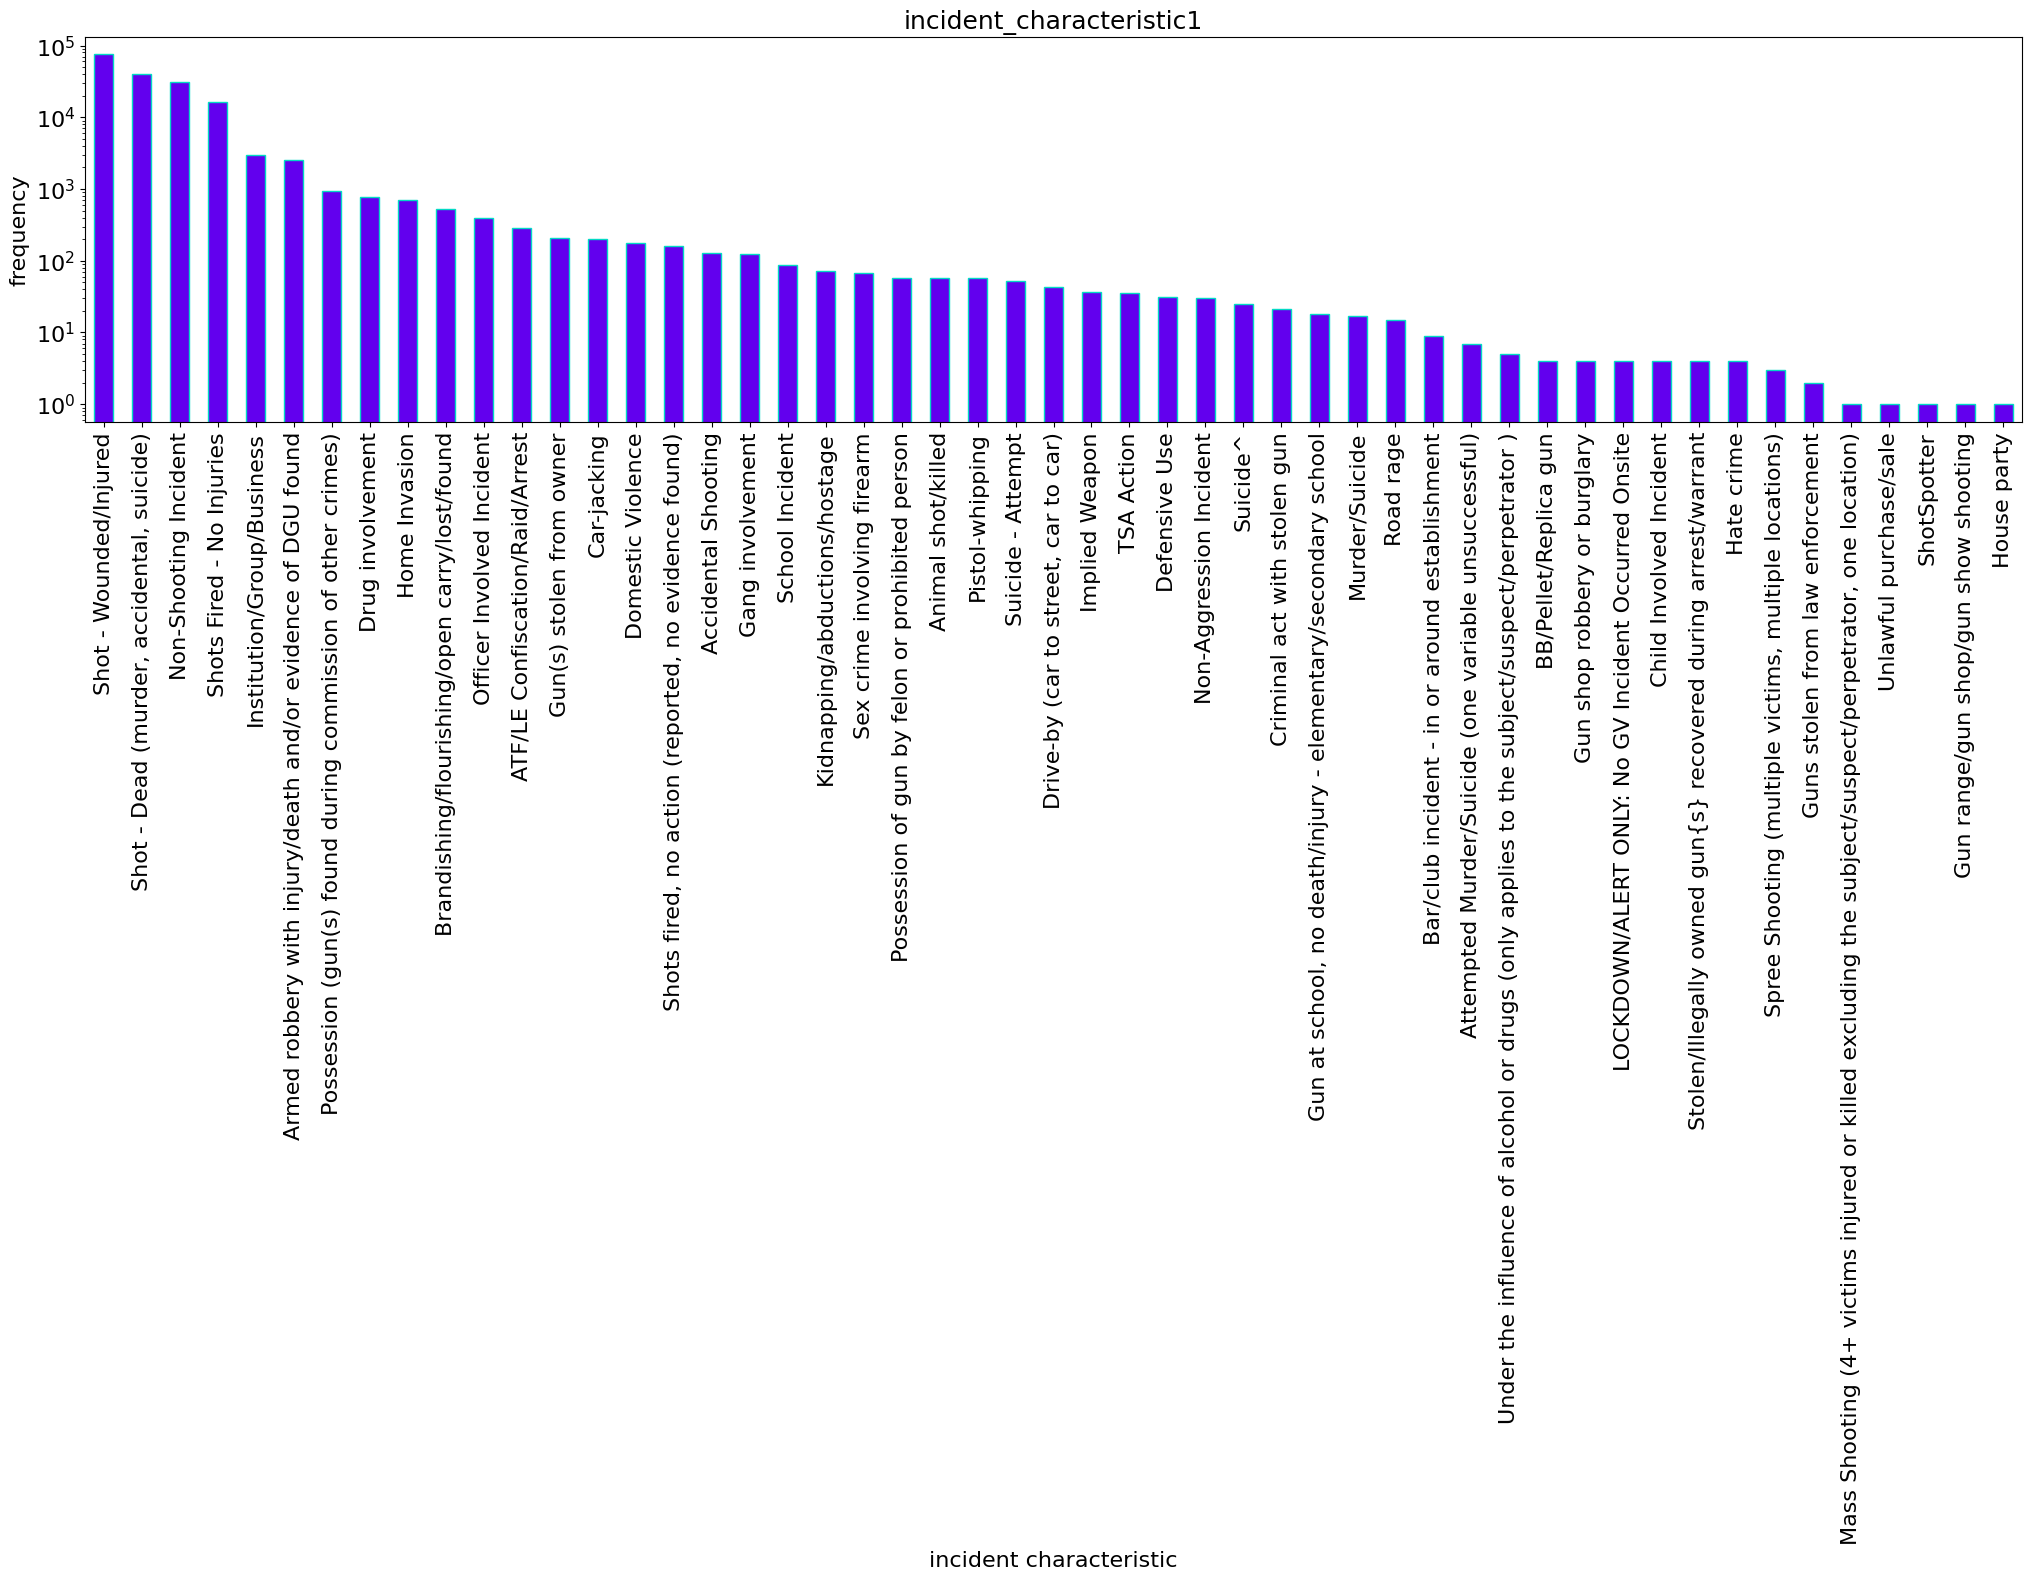

In [24]:
inc1=data["incident_characteristics1"].value_counts()
plt.figure(figsize=(25,5))
ax=inc1.plot(kind="bar",title="incident_characteristic1", color=color, edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_ylabel("frequency",fontsize= 16)
ax.set_xlabel("incident characteristic",fontsize=16)
ax.set_yscale("log")

### Data correlation

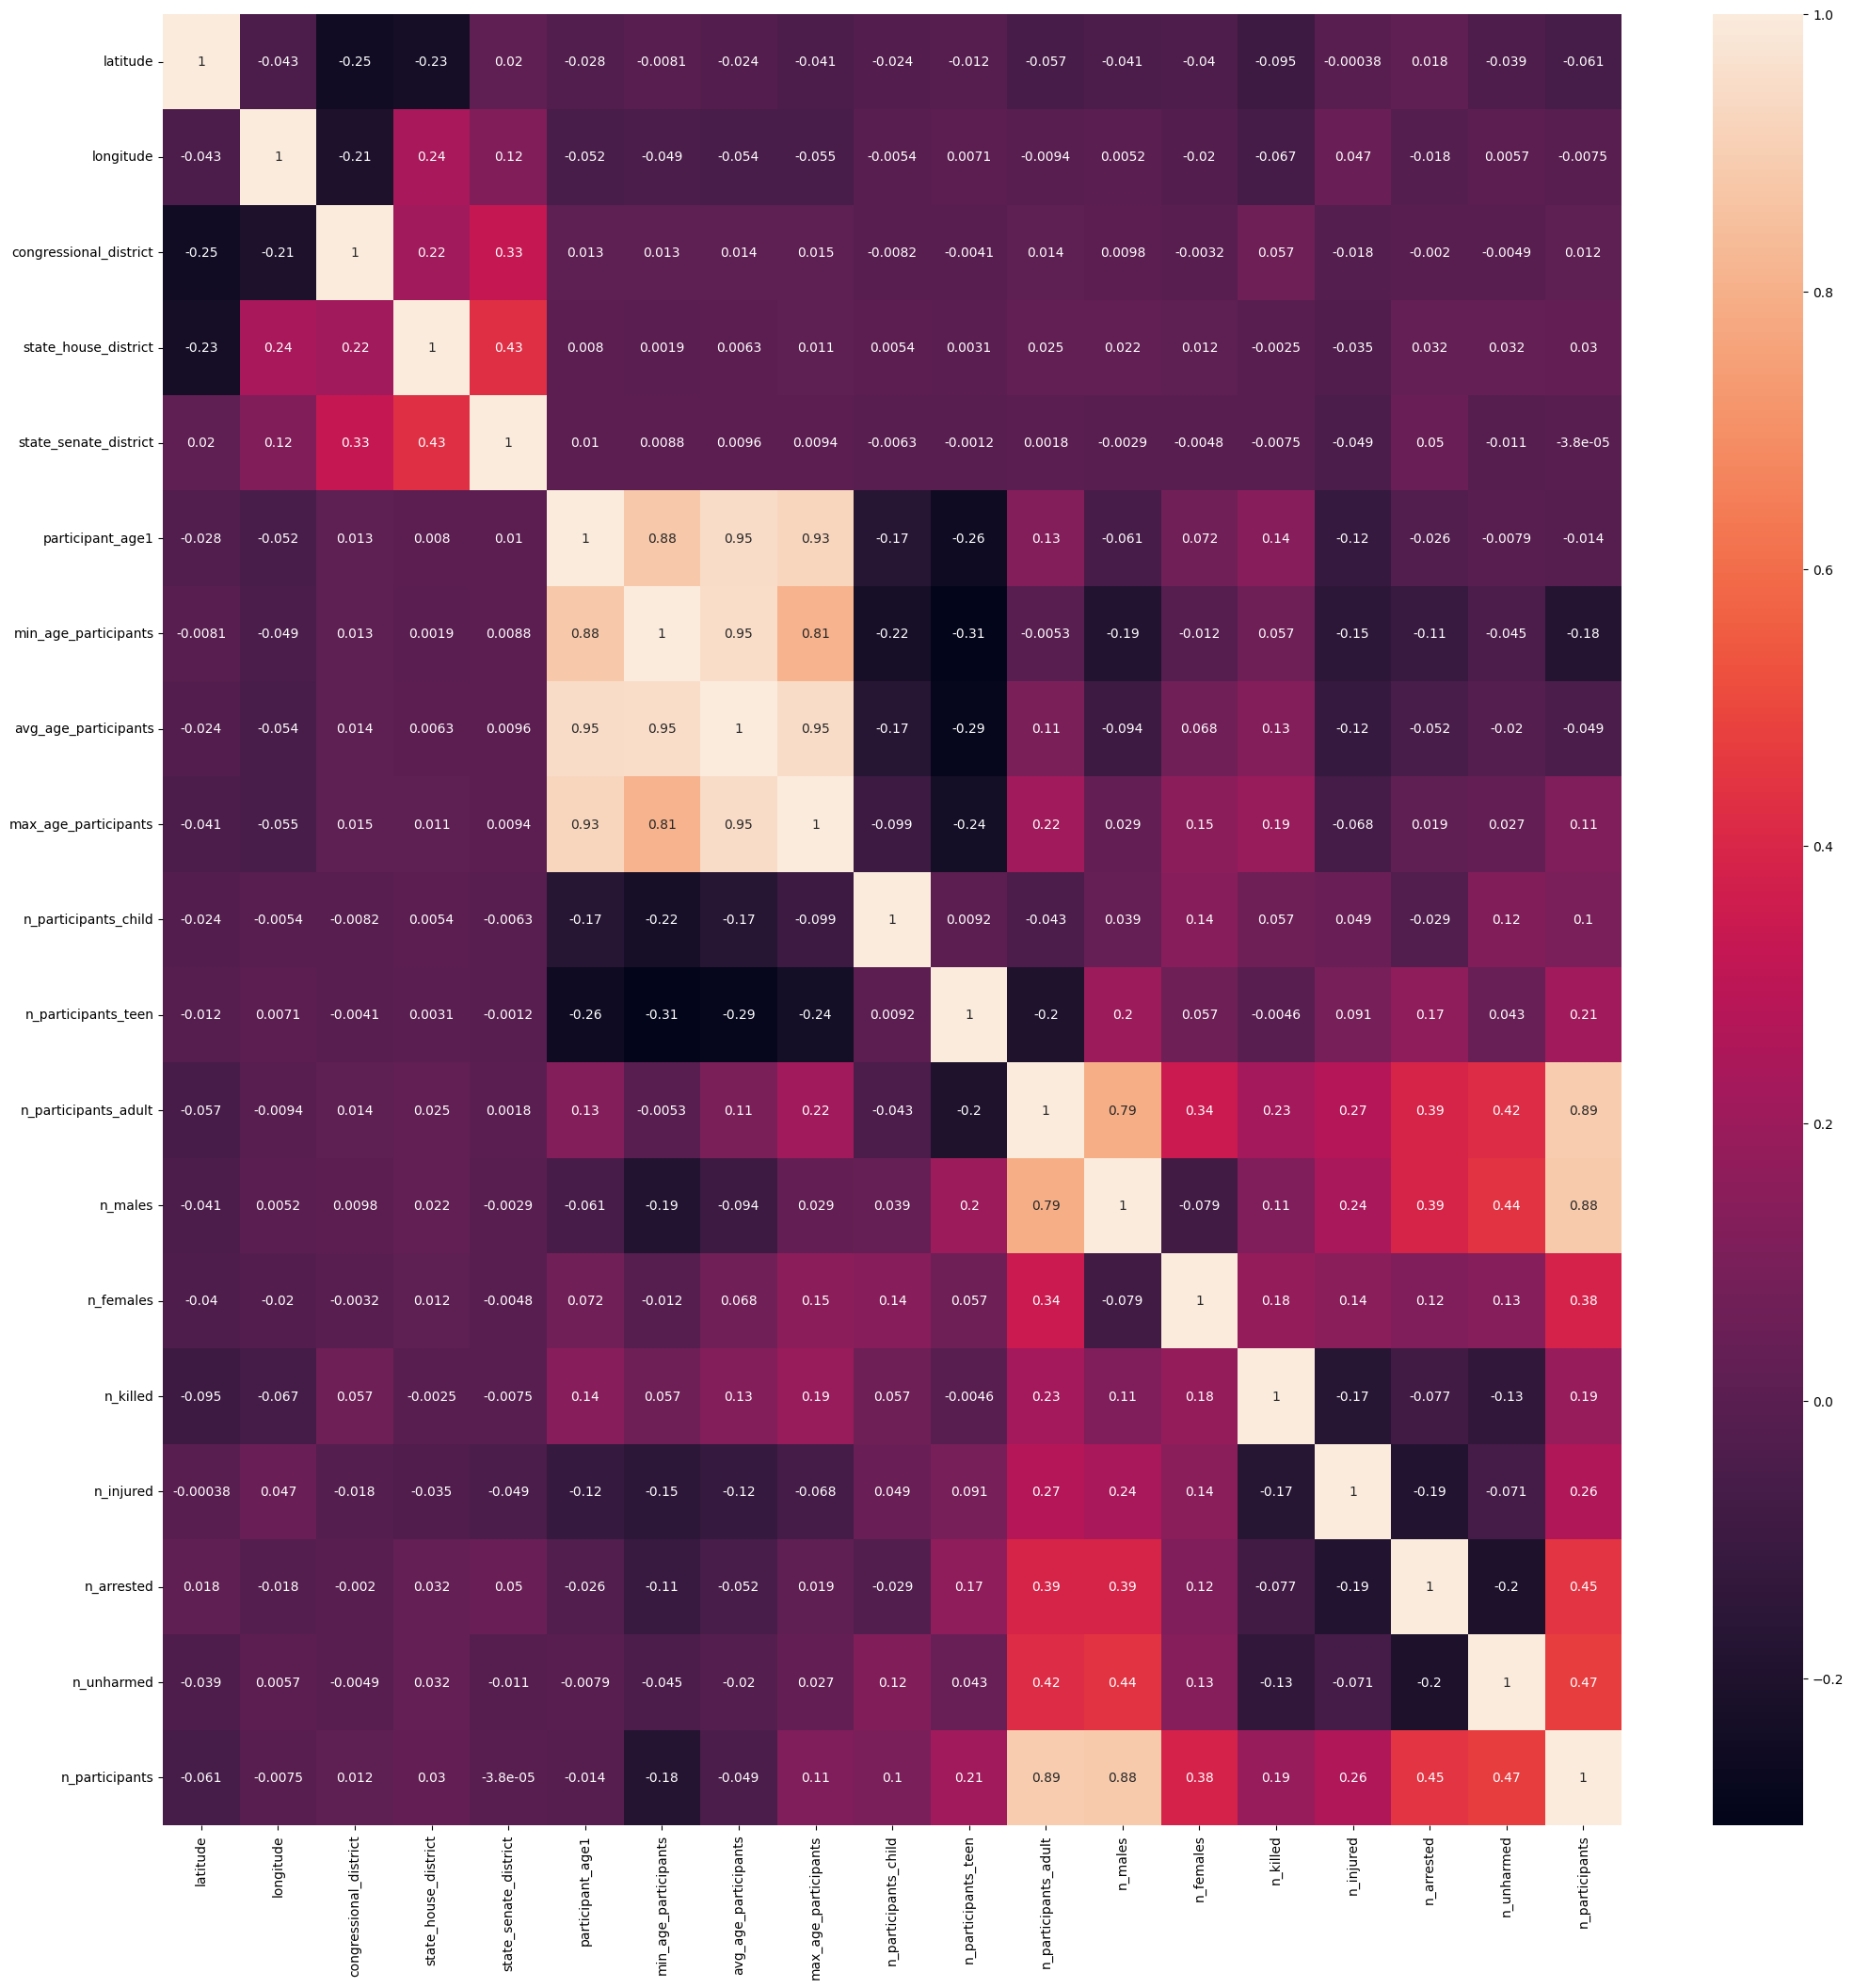

In [26]:
import seaborn as sn

numerical_attributes = ["latitude", "longitude", "congressional_district", "state_house_district", "state_senate_district", 
                        "participant_age1", "min_age_participants", "avg_age_participants", "max_age_participants", 
                        "n_participants_child", "n_participants_teen", "n_participants_adult", "n_males", "n_females", "n_killed", "n_injured", "n_arrested", "n_unharmed", "n_participants"]

corr_matrix = data[numerical_attributes].corr()
plt.figure(figsize=(25,25))
sn.heatmap(corr_matrix, annot=True)
plt.show()